# Data selection for projet2-Covid

In [9]:
# Import
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_profiling import ProfileReport
import os
from sklearn.preprocessing import LabelEncoder
from category_encoders import OrdinalEncoder
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load data

In [125]:
# Load file with descriptions of data variables
data_description_folder = './data/'
data_description = pd.read_csv(data_description_folder + 'IDDO_SDTM_Data-Dictionary_v3.0_2022-10-06.csv', sep=';', encoding="ISO-8859-1")
data_description.columns = data_description.columns.str.replace(' ', '_')
data_description.head(3)

,Domain,Domain_Name,Variable_Name,Variable_Label,Variable_Type,Variable_Definition,Controlled_Terminology?
0,AU,Audiometry Test Results,STUDYID,Study Identifier,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.,NaN
1,AU,Audiometry Test Results,DOMAIN,Domain Abbreviation,character,This variable contains the two-character abbreviation for the domain.,Y
2,AU,Audiometry Test Results,USUBJID,Unique Subject Identifier,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository.",NaN


In [468]:
# Load data
df_list = []
data_folder = './data/DATA_2022-09-01/'
print('Names of DataFrames ---> Description :')
for f in os.listdir(data_folder):
    if f != 'IN_2022-09-01.csv':
        df_name_str = f.split('_')[0]
        df_list.append(df_name_str)
        df_name = df_name_str
        locals()[df_name] = pd.read_csv(data_folder + f, sep=',', low_memory=False) 
        locals()[df_name].name = df_name_str
        print(df_name_str, '---> ', data_description.loc[data_description.Domain==df_name_str, 'Domain_Name'].iloc[0])
    else:
        df_name_str = f.split('_')[0]
        df_list.append(df_name_str)
        df_name = df_name_str
        mylist = []
        for chunk in  pd.read_csv(data_folder + f, sep=',', low_memory=False, chunksize=7000):
            mylist.append(chunk)
        locals()[df_name] = pd.concat(mylist, axis=0)
        locals()[df_name].name = df_name_str
        del mylist

Names of DataFrames ---> Description :
DM --->  Demographics
DS --->  Disposition
ER --->  Environmental Risk
HO --->  Healthcare Encounters
IE --->  Inclusion/Exclusion Criteria
IN --->  Treatments and Interventions
LB --->  Laboratory Results
MB --->  Microbiology Specimen
PO --->  Pregnancy Outcomes
RELREC --->  Related Records
RP --->  Reproductive System Findings
RS --->  Disease Response and Clinical Classification
SA --->  Clinical and Adverse Events
SC --->  Subject Characteristics
SV --->  Subject Visits
TI --->  Trial Inclusion Exclusion Criteria
TS --->  Trial Summary
TV --->  Trial Visits
VS --->  Vital Signs


## 2. Select data

#### For DM:

In [127]:
data_folder = './data/DATA_2022-09-01/'
DM = pd.read_csv(data_folder + 'DM_2022-09-01.csv', sep=',', low_memory=False) 
DM.name = 'DM'

In [128]:
# See variables for DM
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==DM.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
130,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
131,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
132,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
133,SUBJID,character,This variable contains the unique subject identifier provided by the data contributor.
134,RFSTDTC,character,"This variable describes the date and time of the start of the Subject Reference Period. The Subject Reference Period is defined by IDDO as starting with the subject's first study encounter and ending with the subject's final study encounter. RFSTDTC corresponds with the time and date of the subject's first study encounter (e.g., screening, enrollment, admission). This date will be used to calculate the relative days in the --DY?, --STDY, --ENDY variables. This date and time will be provided in ISO 8601 format. This variable will be blank for submissions that do not provide this initial date. All of the derived variables will also be blank since they are all calculated based on RFSTDTC."
135,DTHDTC,character,"This variable describes the date and time of the collection of the observation, administration of a test or collection of a specimen. This date and time will be provided in ISO 8601 format."
136,DTHFL,character,"This variable contains information about whether the subject died during the study period. The variable is expected to be null if the choice is not ""Yes""."
137,SITEID,character,This variable contains information about the study site.
138,INVID,character,This variable contains the unique investigator identifier of the data contributor. This may be used for COVID-19 data where many separate investigators have contributed data to a single large study.
139,INVNAM,character,This variable contains the clinical trial registry number associated with the subjects record.


In [129]:
# Columns really in DM
DM.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'RFSTDTC', 'DTHFL', 'INVID', 'AGE',
       'AGETXT', 'AGEU', 'SEX', 'RACE', 'ETHNIC', 'ARMCD', 'ARM', 'COUNTRY',
       'DMDY'],
      dtype='object')

In [130]:
nb_yes = DM.DTHFL.value_counts()[0]
tot = len(DM.DTHFL)
nb_nothing = tot-nb_yes

print('Yes for death: ', nb_yes, ' / ', round(nb_yes/tot*100,1), '%')
print('No info for death column: ', nb_nothing, ' / ', round(nb_nothing/tot*100,1), '%')

Yes for death:  170955  /  20.2 %
No info for death column:  673496  /  79.8 %


In [131]:
# Replace NA by N for No in DTHFL
DM.DTHFL.fillna('N', inplace=True)

In fact we will not keep this column because the information on death is provided much more precisely with DS. 

In [132]:
# Combine AGE and AGETXT

print('Values for AGETXT: ', DM['AGETXT'].unique())
print('Min and Max for AGE: ', DM['AGE'].min(), DM['AGE'].max())

DM.loc[DM.AGETXT=='95+', 'AGE'] = 96. # We make the choice to put 96 for 95+

print('Min and Max for AGE after: ', DM['AGE'].min(), DM['AGE'].max())

Values for AGETXT:  [nan '95+']
Min and Max for AGE:  -70.0 94.089996
Min and Max for AGE after:  -70.0 96.0


In [133]:
# Investigate and replace negative values for AGE

print('Values for AGEU: ', DM['AGEU'].unique())
print('Number of negative values for AGE: ', (DM['AGE']<0).sum())
print('Number of NA for AGE: ', DM['AGE'].isna().sum())

DM.loc[DM.AGE<0, 'AGE'] = np.nan # We make the choice to replace negative values by NA

print('Number of NA for AGE after: ', DM['AGE'].isna().sum())

Values for AGEU:  ['YEARS' nan 'MONTHS' 'DAYS']
Number of negative values for AGE:  8
Number of NA for AGE:  22493
Number of NA for AGE after:  22501


In [134]:
# Combine AGE and AGEU

print('Values for AGEU: ', DM['AGEU'].unique())
print('Number of NA for AGEU when AGE is not NA: ', DM.loc[DM.AGE.notna(), 'AGEU'].isna().sum())
print('Min and Max for AGE when AGEU is NA: ', DM.loc[DM.AGEU.isna(), 'AGE'].unique())
print('Min and Max for AGE: ', DM['AGE'].min(), DM['AGE'].max())

# We make the choice to keep the YEARS unit
DM.loc[DM.AGEU=='MONTHS', 'AGE'] /= 12
DM.loc[DM.AGEU=='DAYS', 'AGE'] /= 365

# TODO : Que fait-on quand NA pour AGEU ??

Values for AGEU:  ['YEARS' nan 'MONTHS' 'DAYS']
Number of NA for AGEU when AGE is not NA:  593
Min and Max for AGE when AGEU is NA:  [51. 59. 46. 74. 61. 70. 72. 50. 79. 42. 49. 38. 77. 78. 68. 58. 62. 53.
 56. nan 66. 71. 44. 52. 87. 80. 37. 41. 64. 67. 73. 27. 40. 63. 85. 88.
 91. 92. 60. 45. 76. 86. 83. 47. 57. 69. 54. 65. 55. 81. 29. 48. 43. 89.
 39. 75. 25. 36. 84. 28. 32. 33. 96. 90.  0. 24. 35. 23. 19.  3.  5. 34.
 22. 31. 20.  8. 17. 13.  4.  7. 12. 15. 16. 30. 18. 82.]
Min and Max for AGE:  0.0 96.0


In [135]:
# Investigate ARMCD and ARM
print('Values for ARMCD: ', DM['ARMCD'].unique())
print('Values for ARM: ', DM['ARM'].unique())

Values for ARMCD:  ['PER CLIN GUIDE']
Values for ARM:  ['Per Clinical Guidelines']


In [136]:
print('%NA for DMDY: ', round(DM['DMDY'].isna().sum()/DM.shape[0]*100,1))

%NA for DMDY:  64.5


At first we will keep only country and not race and ethnic because the latter two require much more cleaning.

**=> To conclud, for DM, we can keep: USUBJID, RFSTDT, AGE, SEX and COUNTRY:**

In [137]:
# Keep only some columns for DM
DM = DM[['USUBJID', 'RFSTDTC', 'AGE', 'SEX', 'COUNTRY']]
DM.columns

Index(['USUBJID', 'RFSTDTC', 'AGE', 'SEX', 'COUNTRY'], dtype='object')

In [138]:
DM.shape

(844451, 5)

#### For DS:

In [139]:
data_folder = './data/DATA_2022-09-01/'
DS = pd.read_csv(data_folder + 'DS_2022-09-01.csv', sep=',', low_memory=False) 
DS.name = 'DS'

In [140]:
# See variables for DS
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==DS.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
157,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
158,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
159,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
160,DSSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
161,DSTERM,character,This variable contains the verbatim wording of the event as provided by the Data Contributor.
162,DSMODIFY,character,This variable contains a modification of the verbatim wording of the event. This is used to capture IDDO-defined standardised terms of the event.
163,DSDECOD,character,This variable contains a dictionary-derived text description of the event. This is defined by CDISC Controlled Terminology and IDDO Controlled Terminology. More details can be found in the IDDO Implementation Guide.
164,VISITNUM,number,This variable contains a number designating the planned clinical encounter number. This is a numeric version of the visit described in VISIT? and it is used for sorting.
165,VISIT,character,This variable contains the protocol-defined text description of the planned clinical encounter number (as defined in the Trial Visits (TV) Domain).
166,VISITDY,number,This variable contains a number designating the Study Day of the planned clinical encounter. This is also a numeric version of the visit described in VISIT? and can be used for sorting.


In [141]:
# Columns really in DS
DS.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'DSSEQ', 'DSTERM', 'DSMODIFY',
       'DSDECOD', 'VISITNUM', 'VISIT', 'VISITDY', 'DSDY', 'DSSTDY', 'DSEVINTX',
       'DSCDSTDY'],
      dtype='object')

In [142]:
# Investigate DSMODIFY
print('Values for DSMODIFY: ', DS['DSMODIFY'].unique())

Values for DSMODIFY:  [nan]


In [143]:
# Investigate DSTERM and DSDECOD
print('Values for DSTERM: ', DS['DSTERM'].unique())
print('Values for DSDECOD: ', DS['DSDECOD'].unique())
# We make the choice to keep only DSDECOD

Values for DSTERM:  ['DISCHARGED ALIVE' 'DEATH' 'TRANSFER TO OTHER FACILITY'
 'MISSING IN DATABASE' 'UNKNOWN' 'HOSPITALIZATION' 'PALLIATIVE DISCHARGE'
 'Death' 'Hospitalisation' 'Discharged alive' 'Transfer to other facility'
 'Medically fit for discharge (COVID-19 resolved) but remains in hospital for other reason'
 'Palliative discharge' 'Unknown'
 'Ongoing health care needs relating to this admission for COVID-19'
 'Ongoing health care needs NOT related to COVID episode'
 'Discharged alive expected to survive' 'DISCHARGED'
 'CURRENTLY HOSPITALISED' 'DISCHARGE' 'TRANSFERRED TO ANOTHER FACILITY'
 'ALIVE' 'DECEASED' 'Forwarding to home'
 'Transfer to another health care facility' 'Hospitalization'
 'Transfer to the Health District' 'Discharge against medical advice'
 'Palliative care' 'QUARANTINE CENTER'
 'TRANSFER TO OTHER HOSPITAL/FACILITY' 'LONG TERM CARE FACILITY'
 'DEATH IN HOSPITAL' 'TRANSFERRED TO ANOTHER UNIT' 'HOSPITAL DISCHARGE'
 'DISCHARGE WITH PALLIATIVE CARE' 'HOSPITALIZED

In [144]:
# Replace UNKNOWN by NA in DSDECOD
DS['DSDECOD'].replace('UNKNOWN', np.nan, inplace=True)
print('Values for DSDECOD: ', DS['DSDECOD'].unique())

Values for DSDECOD:  ['DISCHARGED' 'DEATH' 'TRANSFERRED' nan 'STILL IN HOSPITAL'
 'LOST TO FOLLOW-UP']


In [145]:
DS.DSDECOD.value_counts()

DISCHARGED           608454
DEATH                170551
TRANSFERRED           28089
STILL IN HOSPITAL     12868
LOST TO FOLLOW-UP         3
Name: DSDECOD, dtype: int64

In [146]:
DS.DSDECOD.value_counts(normalize=True)

DISCHARGED           0.742049
DEATH                0.207998
TRANSFERRED          0.034256
STILL IN HOSPITAL    0.015693
LOST TO FOLLOW-UP    0.000004
Name: DSDECOD, dtype: float64

In [147]:
round(DS.DSDECOD.isna().sum()/len(DS.DSDECOD),3)

0.006

In [148]:
# Investigate VISITNUM, VISIT and VISITDY

print('Values for VISITNUM: ', DS['VISITNUM'].unique())
print('Values for VISIT: ', DS['VISIT'].unique())
print('Values for VISITDY: ', DS['VISITDY'].unique())

print('%NA for VISITNUM: ', round(DS['VISITNUM'].isna().sum()/DS.shape[0]*100,2))
print('%NA for VISIT: ', round(DS['VISIT'].isna().sum()/DS.shape[0]*100,2))
print('%NA for VISITDY: ', round(DS['VISITDY'].isna().sum()/DS.shape[0]*100,2))

Values for VISITNUM:  [nan  1.  2.]
Values for VISIT:  [nan 'Day 0' 'Week 2 Day 14']
Values for VISITDY:  [nan  1. 15.]
%NA for VISITNUM:  99.82
%NA for VISIT:  99.82
%NA for VISITDY:  99.82


In [149]:
# Investigate DSDY, DSEVINTX and DSCDSTDY

print('Values for DSDY: ', DS['DSDY'].unique())
print('Values for DSEVINTX: ', DS['DSEVINTX'].unique())
print('Values for DSCDSTDY: ', DS['DSCDSTDY'].unique())

print('%NA for DSDY: ', round(DS['DSDY'].isna().sum()/DS.shape[0]*100,2))
print('%NA for DSEVINTX: ', round(DS['DSEVINTX'].isna().sum()/DS.shape[0]*100,2))
print('%NA for DSCDSTDY: ', round(DS['DSCDSTDY'].isna().sum()/DS.shape[0]*100,2))

Values for DSDY:  [nan 78. 75. 29. 28. 24. 17. 32. 25. 21. 22. 30. 50. 38. 33. 36. 31. 45.
 80. 35. 59. 63. 34. 27. 26. 39. 49. 53. 16. 19. 20. 37. 72. 46. 11. 40.
 23. 48. 42. 54. 14. 90. 41. 51. 13.  7. 12.]
Values for DSEVINTX:  [nan 'AT ANY TIME AFTER DISCHARGE']
Values for DSCDSTDY:  [ nan  16.   2.  20.   8.   5.   4.   1.   9.  14.  25.  51.  18.  19.
  24.  12.  55.   6.  13.  23.  28. 109.   7.  11.  21.   3.]
%NA for DSDY:  99.88
%NA for DSEVINTX:  99.84
%NA for DSCDSTDY:  99.99


**=> To conclud, for DS, we can keep: USUBJID, DSSEQ and DSDECOD:**

In [150]:
# Keep only some columns for DS
DS = DS[['USUBJID', 'DSSEQ', 'DSDECOD']]
DS.columns

Index(['USUBJID', 'DSSEQ', 'DSDECOD'], dtype='object')

In [151]:
DS.shape

(824787, 3)

#### For ER:

In [152]:
data_folder = './data/DATA_2022-09-01/'
ER = pd.read_csv(data_folder + 'ER_2022-09-01.csv', sep=',', low_memory=False) 
ER.name = 'ER'

In [153]:
# See variables for ER
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==ER.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
180,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
181,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
182,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
183,ERSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
184,ERTERM,character,This variable contains the verbatim wording of the event as provided by the Data Contributor.
185,ERMODIFY,character,This variable contains a modification of the verbatim wording of the event. This is used to capture IDDO-defined standardised terms of the event.
186,ERCAT,character,This variable contains a categorization of the observation.
187,ERSCAT,character,This variable contains a further categorization of the observation.
188,ERPRESP,character,"This variable identifies whether an observation was pre-specified on the CRF. Values are null for spontaneously reported events, i.e. those collected as free-text verbatim terms."
189,EROCCUR,character,This variable identifies whether or not a pre-specified event has occurred. Values are null for spontaneously reported events.


In [154]:
# Columns really in ER
ER.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'ERSEQ', 'ERTERM', 'ERCAT', 'ERPRESP',
       'EROCCUR', 'ERSTAT', 'ERREASND', 'VISITNUM', 'VISIT', 'VISITDY', 'ERDY',
       'ERSTDY', 'ERENDY', 'EREVINTX', 'ERCNTRY'],
      dtype='object')

In [155]:
# Investigate ERCAT
print('Values for ERCAT: ', ER['ERCAT'].unique())

Values for ERCAT:  ['COVID-19 RISK FACTOR']


**=> To conclud, for ER, we can keep nothing because there is no decod of the event, and ECAT is only one value.**

#### For HO:

In [156]:
data_folder = './data/DATA_2022-09-01/'
HO = pd.read_csv(data_folder + 'HO_2022-09-01.csv', sep=',', low_memory=False) 
HO.name = 'HO'

In [157]:
# See variables for HO
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==HO.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
208,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
209,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
210,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
211,HOSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
212,HOREFID,character,"This variable contains an identifier to distinguish duplicate findings, collections or events occurring within the same time period where no other timing information is available. This variable is used to make the rows' timing details unique."
213,HOTERM,character,This variable contains the verbatim wording of the event as provided by the Data Contributor.
214,HODECOD,character,This variable contains a dictionary-derived text description of the event. This is defined by CDISC Controlled Terminology and IDDO Controlled Terminology. More details can be found in the IDDO Implementation Guide.
215,HOCAT,character,This variable contains a categorization of the observation.
216,HOPRESP,character,"This variable identifies whether an observation was pre-specified on the CRF. Values are null for spontaneously reported events, i.e. those collected as free-text verbatim terms."
217,HOOCCUR,character,This variable identifies whether or not a pre-specified event has occurred. Values are null for spontaneously reported events.


In [158]:
# Columns really in HO
HO.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'HOSEQ', 'HOREFID', 'HOTERM', 'HODECOD',
       'HOCAT', 'HOPRESP', 'HOOCCUR', 'HOSTAT', 'HOREASND', 'HOPATT',
       'VISITNUM', 'VISIT', 'VISITDY', 'HODY', 'HOSTDY', 'HOENDY', 'HODUR',
       'HOSTRF', 'HOEVINTX', 'HOCDSTDY', 'HODISOUT', 'SELFCARE', 'HOINDC'],
      dtype='object')

In [159]:
# Investigate HODECOD
print('Values for HODECOD: ', HO['HODECOD'].unique())

Values for HODECOD:  ['HOSPITAL' 'INTENSIVE CARE UNIT']


In [160]:
# NA value for HODY
print('%NA for HODY: ', round(HO['HODY'].isna().sum()/HO.shape[0]*100,2))

%NA for HODY:  65.12


**=> To conclud, for HO, we can keep: USUBJID, HOSEQ and HODECOD:**

In [161]:
# Keep only some columns for HO
HO = HO[['USUBJID', 'HOSEQ', 'HODECOD']]
HO.columns

Index(['USUBJID', 'HOSEQ', 'HODECOD'], dtype='object')

In [162]:
HO.shape

(2336786, 3)

#### For IE:

In [163]:
data_folder = './data/DATA_2022-09-01/'
IE = pd.read_csv(data_folder + 'IE_2022-09-01.csv', sep=',', low_memory=False) 
IE.name = 'IE'

In [164]:
# See variables for IE
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==IE.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
239,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
240,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
241,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
242,IESEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
243,IETESTCD,character,This variable identifies the shortened code for the name of the test or examination performed.
244,IETEST,character,This variable identifies the name of the test or examination performed.
245,IECAT,character,This variable contains a categorization of the observation.
246,IEORRES,character,"This variable contains the result of the test or examination performed as provided by the data contributor. The original data can be either numericm e.g. ""503"" or string, e.g., ""Positive""."
247,IESTRESC,character,"This variable contains the converted, standardized result of the test or examination performed. The data can be either numeric, e.g. ""503"", or string, e.g. ""Positive"", and is stored as a string in the repository. The standard units and conversion formulas (as applicable) are described in detail in the IDDO Implementation Guide in the relevant sections about the variable --STRESU."
248,IESTAT,character,This variable contains information about the status of the observation  specifically that it was not completed when it was expected to have been. This column should be empty when there is a value in the --OCCUR (Events and Interventions Domains) or --ORRES (Findings Domains) variables.


In [165]:
# Columns really in IE
IE.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'IESEQ', 'IETESTCD', 'IETEST', 'IECAT',
       'IEORRES', 'IESTRESC', 'IESTAT', 'IEREASND', 'IEDY'],
      dtype='object')

**=> To conclud, for IE, we can keep nothing.**

#### For IN:

In [166]:
data_folder = './data/DATA_2022-09-01/'
mylist = []
for chunk in pd.read_csv(data_folder + 'IN_2022-09-01.csv', sep=',', low_memory=False, chunksize=5000):
    mylist.append(chunk)
IN = pd.concat(mylist, axis=0)
IN.name = 'IN'
del mylist

In [167]:
# See variables for IN
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==IN.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
252,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
253,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
254,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
255,SPDEVID,character,This variable contains the short code for the device in use. This code will be the same as in the DI domain under the same variable name (SPDEVID). This functions as a key to link the descriptions of the device found in the DI domain with the usage in the IN domain.
256,INSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
...,...,...,...
312,DOSVOMIT,character,This variable identifies whether or not the dose given was vomited.
313,DOTIND,character,This variable identifies whether ot not the treatment or intervention was administered under direct observation of research staff.
314,RDIND,character,This variable identifies if the dose given was a redose due to the previous dose being vomited.
315,TDOSIND,character,This variable ??identifies if the dose reported in INDOSE is the total dose given to the subject over the entire treatment period (NOT a daily dose - see INDOSTOT for this case).


In [168]:
# Columns really in IN
IN.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'SPDEVID', 'INSEQ', 'INREFID', 'INTRT',
       'INMODIFY', 'INDECOD', 'INCAT', 'INSCAT', 'INPRESP', 'INOCCUR',
       'INSTAT', 'INREASND', 'ININDC', 'INCLAS', 'INCLASCD', 'INDOSE',
       'INDOSTXT', 'INDOSU', 'INDOSFRM', 'INDOSFRQ', 'INDOSTOT', 'INDOSRGM',
       'INROUTE', 'VISITNUM', 'VISIT', 'VISITDY', 'INDY', 'INSTDY', 'INENDY',
       'INDUR', 'INSTRF', 'INEVLINT', 'INEVINTX', 'INCDSTDY'],
      dtype='object')

In [169]:
# Investigate INCLAS
print('Values for INCLAS: ', IN['INCLAS'].unique())

Values for INCLAS:  ['ARTIFICIAL RESPIRATION' 'ANTIMALARIALS' 'OXYGEN'
 'ANTIVIRALS FOR SYSTEMIC USE' 'HIGH FLOW OXYGEN NASAL CANNULA'
 'CORTICOSTEROIDS FOR SYSTEMIC USE' 'CHEMOTHERAPY'
 'ANTIINFLAMMATORY AND ANTIRHEUMATIC PRODUCTS, NON-STEROIDS'
 'EXTRACORPOREAL MEMBRANE OXYGENATION' 'IMMUNOSTIMULANTS'
 'PRONE BODY POSITION' 'CARDIOPULMONARY RESUSCITATION'
 'IMMUNOSUPPRESSANTS' 'RENAL REPLACEMENT'
 'ANTIBACTERIALS FOR SYSTEMIC USE' nan 'ANTITHROMBOTIC AGENTS'
 'ANTIMYCOTICS FOR SYSTEMIC USE' 'CARDIAC THERAPY' 'VACCINES'
 'CARDIAC PACING' 'AGENTS ACTING ON THE RENIN-ANGIOTENSIN SYSTEM'
 'NONINVASIVE VENTILATION' 'IMMUNOGLOBULINS' 'ANALGESICS'
 'TRANSFUSION OF BLOOD PRODUCT' 'LIPID MODIFYING AGENTS'
 'DRUGS FOR ACID RELATED DISORDERS' 'MUSCLE RELAXANTS'
 'OTHER RESPIRATORY SYSTEM PRODUCTS' 'INSERTION OF TRACHEOSTOMY TUBE'
 'DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES' 'PSYCHOLEPTICS' 'DIURETICS'
 'BETA BLOCKING AGENTS' 'ANESTHETICS'
 'BLOOD SUBSTITUTES AND PERFUSION SOLUTIONS' 'BRONCHOSCOPY'


In [170]:
# Investigate INCLAS
print('Values for INCLAS:\n', IN['INCLAS'].value_counts(normalize=True, dropna=False))

Values for INCLAS:
 ANTIVIRALS FOR SYSTEMIC USE                                  0.099480
ARTIFICIAL RESPIRATION                                       0.091678
CORTICOSTEROIDS FOR SYSTEMIC USE                             0.083986
IMMUNOSUPPRESSANTS                                           0.068704
OXYGEN                                                       0.062425
ANTIBACTERIALS FOR SYSTEMIC USE                              0.059972
NaN                                                          0.048714
HIGH FLOW OXYGEN NASAL CANNULA                               0.044329
ANTIINFLAMMATORY AND ANTIRHEUMATIC PRODUCTS, NON-STEROIDS    0.040269
CARDIAC THERAPY                                              0.038568
PRONE BODY POSITION                                          0.035545
NONINVASIVE VENTILATION                                      0.035530
EXTRACORPOREAL MEMBRANE OXYGENATION                          0.035166
ANTIMYCOTICS FOR SYSTEMIC USE                                0.030266


In [171]:
# Count NA for INDY
print('%NA for INDY: ', round(IN['INDY'].isna().sum()/IN.shape[0]*100,1))

%NA for INDY:  66.2


**=> To conclud, for IN, we can keep: USUBJID, INSEQ and INCLAS:**

In [172]:
# Keep only some columns for IN
IN.drop(columns =['STUDYID', 'DOMAIN', 'SPDEVID', 'INREFID', 'INTRT',
       'INMODIFY', 'INDECOD', 'INCAT', 'INSCAT', 'INPRESP', 'INOCCUR',
       'INSTAT', 'INREASND', 'ININDC', 'INCLASCD', 'INDOSE',
       'INDOSTXT', 'INDOSU', 'INDOSFRM', 'INDOSFRQ', 'INDOSTOT', 'INDOSRGM',
       'INROUTE', 'VISITNUM', 'VISIT', 'VISITDY', 'INDY', 'INSTDY', 'INENDY',
       'INDUR', 'INSTRF', 'INEVLINT', 'INEVINTX', 'INCDSTDY'], inplace=True)
IN.columns

Index(['USUBJID', 'INSEQ', 'INCLAS'], dtype='object')

In [173]:
IN.shape

(43338429, 3)

#### For LB:

In [174]:
data_folder = './data/DATA_2022-09-01/'
LB = pd.read_csv(data_folder + 'LB_2022-09-01.csv', sep=',', low_memory=False) 
LB.name = 'LB'

In [175]:
# See variables for LB
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==LB.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
317,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
318,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
319,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
320,LBSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
321,LBREFID,character,"This variable contains an identifier to distinguish duplicate findings, collections or events occurring within the same time period where no other timing information is available. This variable is used to make the rows' timing details unique."
322,LBTESTCD,character,This variable identifies the shortened code for the name of the test or examination performed. This is defined by CDISC Controlled Terminology.
323,LBTEST,character,This variable identifies the name of the test or examination performed. This is defined by CDISC Controlled Terminology.
324,LBCAT,character,This variable contains a categorization of the observation.
325,LBSCAT,character,This variable contains a further categorization of the observation.
326,LBORRES,character,"This variable contains the result of the test or examination performed as provided by the data contributor. The original data can be either numericm e.g. ""503"" or string, e.g., ""Positive""."


In [176]:
# Columns really in LB
LB.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'LBSEQ', 'LBTESTCD', 'LBTEST', 'LBCAT',
       'LBSCAT', 'LBORRES', 'LBORRESU', 'LBSTRESC', 'LBSTRESN', 'LBSTRESU',
       'LBSTAT', 'LBREASND', 'LBSPEC', 'LBMETHOD', 'VISITNUM', 'VISIT',
       'VISITDY', 'LBDY', 'LBSTRF', 'LBEVINTX', 'LBCDSTDY'],
      dtype='object')

In [177]:
# Investigate LBTESTCD
print('Values for LBTESTCD: ', LB['LBTESTCD'].unique())

Values for LBTESTCD:  ['HCT' 'PLAT' 'HGB' 'WBC' 'AST' 'BILI' 'CREAT' 'LYM' 'INR' 'PCO2' 'NEUT'
 'PT' 'UREAN' 'CRP' 'ALT' 'GLUC' 'PH' 'SODIUM' 'BICARB' 'PO2' 'K' 'CK'
 'TROPONI' 'LDH' 'FERRITIN' 'PCT' 'DDIMER' 'LACTICAC' 'NEUTLE' 'LYMLE'
 'BASEEXCS' 'INTLK6' 'APTT' 'APTTSTND' 'HBA1C' 'ESR' 'OXYSAT' 'ALB'
 'TROPONIN' 'MCH' 'RBC' 'RDW' 'IRON' 'MONO' 'EOS' 'EOSLE' 'BASOLE'
 'MONOLE' 'MCHC' 'MCV' 'PROT' 'CL' 'AMYLASE' 'MPV' 'PLATHCT' 'BASO' 'CHOL'
 'URATE' 'PTAC' 'FIBRINO' 'BILDIR' 'CA' 'GGT' 'TT' 'MG' 'CAION' 'CAIONPH'
 'CARBXHGB' 'HGBDOXY' 'HGBMET' 'HGBOXY' 'CO2' 'TROPONT' 'PO2FIO2'
 'FIBRINOF' 'UREA' 'ALP' 'CD4' 'NEUTSG' 'AUERRODS']


In [178]:
# Check units
for t in LB['LBTESTCD'].unique():
    print(t, ' ---> ', LB.LBSTRESU[LB.LBTESTCD == t].unique())

HCT  --->  ['%' nan]
PLAT  --->  ['10^9/L' nan]
HGB  --->  ['g/L' nan]
WBC  --->  ['10^9/L' nan]
AST  --->  ['U/L' nan]
BILI  --->  ['umol/L' nan]
CREAT  --->  ['umol/L' nan]
LYM  --->  ['10^9/L' nan]
INR  --->  ['RATIO' nan]
PCO2  --->  [nan]
NEUT  --->  ['10^9/L' nan]
PT  --->  ['sec' nan]
UREAN  --->  ['mmol/L' nan]
CRP  --->  ['mg/L' nan]
ALT  --->  ['U/L' nan]
GLUC  --->  ['mmol/L' nan]
PH  --->  [nan]
SODIUM  --->  ['mmol/L' nan]
BICARB  --->  ['mEq/L' nan]
PO2  --->  [nan]
K  --->  ['mmol/L' nan]
CK  --->  ['U/L' nan]
TROPONI  --->  ['ug/L' nan]
LDH  --->  ['U/L' nan]
FERRITIN  --->  ['ug/L' nan]
PCT  --->  ['ug/L' nan]
DDIMER  --->  [nan 'mg/L']
LACTICAC  --->  ['mmol/L' nan]
NEUTLE  --->  ['%']
LYMLE  --->  ['%']
BASEEXCS  --->  ['mmol/L' nan]
INTLK6  --->  ['ng/L' nan]
APTT  --->  ['sec' nan]
APTTSTND  --->  ['RATIO' nan]
HBA1C  --->  [nan]
ESR  --->  [nan 'mm/h']
OXYSAT  --->  [nan]
ALB  --->  [nan]
TROPONIN  --->  [nan]
MCH  --->  [nan]
RBC  --->  [nan]
RDW  --->  [nan]
IRO

There is only one unit for each test so we do not need to uniformize them.

In [179]:
# NA for LBDY
print('%NA for LB: ', round(LB['LBDY'].isna().sum()/LB.shape[0]*100,2))

%NA for LB:  2.01


**=> To conclud, for LB, we can keep: USUBJID, LBSEQ, LBTESTCD, LBSTRESC, LBSTRESU and LBDY:**

In [180]:
# Keep only some columns for LB
LB = LB[['USUBJID', 'LBSEQ', 'LBTESTCD', 'LBSTRESC', 'LBSTRESU', 'LBDY']]
LB.columns

Index(['USUBJID', 'LBSEQ', 'LBTESTCD', 'LBSTRESC', 'LBSTRESU', 'LBDY'], dtype='object')

In [181]:
LB.shape

(7330863, 6)

#### For MB:

In [182]:
data_folder = './data/DATA_2022-09-01/'
MB = pd.read_csv(data_folder + 'MB_2022-09-01.csv', sep=',', low_memory=False) 
MB.name = 'MB'

In [183]:
# See variables for MB
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==MB.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
356,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
357,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
358,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
359,MBSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
360,MBGRPID,character,This variable contains an identifier used to link together a block of related records and distinguish duplicate findings or events that occur within the same time period where no other timing information is available. This variable is used to make the rows' timing details unique.
361,MBREFID,character,"This variable contains an identifier to distinguish duplicate findings, collections or events occurring within the same time period where no other timing information is available. This variable is used to make the rows' timing details unique."
362,MBTESTCD,character,This variable identifies the shortened code for the name of the test or examination performed. This is defined by CDISC Controlled Terminology.
363,MBTEST,character,This variable identifies the name of the test or examination performed. This is defined by CDISC Controlled Terminology.
364,MBMODIFY,character,This variable contains a modification of the result as provided by the data contributor. This is used for the capture of the non-standard grade scale corresponding to the result contained in --ORRES.
365,MBTSTDTL,character,This variable describes the test type.


In [184]:
# Columns really in MB
MB.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'MBSEQ', 'MBTESTCD', 'MBTEST',
       'MBTSTDTL', 'MBCAT', 'MBSCAT', 'MBORRES', 'MBORRESU', 'MBSTRESC',
       'MBSTRESN', 'MBSTRESU', 'MBSTAT', 'MBREASND', 'MBSPEC', 'MBLOC',
       'MBMETHOD', 'VISITNUM', 'VISIT', 'VISITDY', 'MBDY', 'MBSTRF',
       'MBEVINTX', 'MBCDSTDY'],
      dtype='object')

In [185]:
# Investigate MBTESTCD
print('Values for MBTESTCD: ', MB['MBTESTCD'].unique())

Values for MBTESTCD:  ['BACT' 'RSV' 'CRONAVIR' 'ADENOVIR' 'OTHRDIND' 'INFLUVIR' 'SARSCOV2'
 'MCORGIDN' 'HIV12P24' 'PLSMDM' 'HIV' 'OTHPHIND' 'PFALCIP' 'SAR2IGG'
 'SAR2IGM' 'SAR2IGGM' 'SAR2AB']


In [186]:
# Investigate MBTSTDTL
print('Values for MBTSTDTL: ', MB['MBTSTDTL'].unique())

Values for MBTSTDTL:  ['DETECTION' 'IDENTIFICATION' 'VARIANT TYPE']


In [187]:
# Replace UNKNOWN by NA in MBSTRESC
MB.replace('UNKNOWN', np.nan, inplace=True)

In [188]:
# Replace NOT SURE by NA in MBSTRESC
MB.replace('NOT SURE', np.nan, inplace=True)

In [189]:
# Investigate MBSTRESC
print('Values for MBSTRESC for detection:\n', MB.loc[MB.MBTSTDTL=='DETECTION', 'MBSTRESC'].value_counts(normalize=True, dropna=False))

Values for MBSTRESC for detection:
 POSITIVE    0.477894
NaN         0.277023
NEGATIVE    0.245084
Name: MBSTRESC, dtype: float64


In [190]:
# Investigate MBSTRESC
print('Values for MBSTRESC for identification:\n', MB.loc[MB.MBTSTDTL=='IDENTIFICATION', 'MBSTRESC'].value_counts(normalize=True, dropna=False))

Values for MBSTRESC for identification:
 SEVERE ACUTE RESPIRATORY SYNDROME CORONAVIRUS 2    0.819583
NaN                                                0.068448
ESCHERICHIA COLI                                   0.009928
METHICILLIN RESISTANT STAPHYLOCOCCUS AUREUS        0.009609
STAPHYLOCOCCUS AUREUS                              0.006104
                                                     ...   
ROTHIA DENTOCARIOSA                                0.000008
CAMPYLOBACTER COLI                                 0.000008
MEASLES MORBILLIVIRUS                              0.000008
PSYCHROBACTER PHENYLPYRUVICUS                      0.000008
PLASMODIUM                                         0.000008
Name: MBSTRESC, Length: 338, dtype: float64


In [191]:
# Investigate MBSTRESC
print('Values for MBSTRESC for variant type:\n', MB.loc[MB.MBTSTDTL=='VARIANT TYPE', 'MBSTRESC'].value_counts(normalize=True, dropna=False))

Values for MBSTRESC for variant type:
 NaN                    0.565113
OMICRON - B.1.1.529    0.282316
DELTA - B.1.617.2      0.096348
BETA - B.1.351         0.040005
OMICRON                0.011413
ALPHA - B.1.1.7        0.004565
THETA- P.3             0.000120
KAPPA - B.1.617.1      0.000120
Name: MBSTRESC, dtype: float64


In [192]:
# Investigate MBTESTCD
print('Values for MBTESTCD for detection: ', MB.loc[MB.MBTSTDTL!='DETECTION', 'MBTESTCD'].unique())

Values for MBTESTCD for detection:  ['MCORGIDN' 'SARSCOV2']


In [193]:
# Investigate MBTESTCD
print('Values for MBTESTCD:\n', MB['MBTESTCD'].value_counts(normalize=True, dropna=False))

Values for MBTESTCD:
 SARSCOV2    4.473739e-01
INFLUVIR    2.859827e-01
MCORGIDN    6.206561e-02
CRONAVIR    5.116250e-02
RSV         5.113892e-02
ADENOVIR    4.509914e-02
BACT        4.349690e-02
OTHRDIND    9.830854e-03
HIV         1.187303e-03
PLSMDM      1.106672e-03
OTHPHIND    9.737020e-04
HIV12P24    2.866881e-04
PFALCIP     2.739568e-04
SAR2IGGM    1.178816e-05
SAR2IGG     6.601370e-06
SAR2IGM     2.357632e-06
SAR2AB      4.715264e-07
Name: MBTESTCD, dtype: float64


In [194]:
# NA value for MBDY
print('%NA for MBDY: ', round(MB['MBDY'].isna().sum()/MB.shape[0]*100,2))

%NA for MBDY:  99.16


**=> To conclud, for MB, we can keep: USUBJID, MBSEQ, MBTESTCD, MBTSTDTL and MBSTRESC**

In [195]:
# Keep only some columns for MB
MB = MB[['USUBJID', 'MBSEQ', 'MBTESTCD', 'MBTSTDTL', 'MBSTRESC']]
MB.columns

Index(['USUBJID', 'MBSEQ', 'MBTESTCD', 'MBTSTDTL', 'MBSTRESC'], dtype='object')

In [196]:
MB.shape

(2120772, 5)

#### For PO:

In [197]:
data_folder = './data/DATA_2022-09-01/'
PO = pd.read_csv(data_folder + 'PO_2022-09-01.csv', sep=',', low_memory=False) 
PO.name = 'PO'

In [198]:
# See variables for PO
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==PO.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
519,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
520,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
521,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
522,POSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
523,POTERM,character,This variable contains the verbatim wording of the event as provided by the Data Contributor.
524,POMODIFY,character,This variable contains a modification of the verbatim wording of the event. This is used to capture IDDO-defined standardised terms of the event.
525,POCAT,character,This variable contains a categorization of the observation.
526,POPRESP,character,"This variable identifies whether an observation was pre-specified on the CRF. Values are null for spontaneously reported events, i.e. those collected as free-text verbatim terms."
527,POOCCUR,character,This variable identifies whether or not a pre-specified event has occurred. Values are null for spontaneously reported events.
528,POSTAT,character,This variable contains information about the status of the observation  specifically that it was not completed when it was expected to have been. This column should be empty when there is a value in the --OCCUR (Events and Interventions Domains) or --ORRES (Findings Domains) variables.


In [199]:
# Columns really in PO
PO.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'POSEQ', 'POTERM', 'POCAT', 'VISITNUM',
       'VISIT', 'VISITDY', 'PODY', 'POSTDY', 'POENDY'],
      dtype='object')

In [200]:
# Investigate POTERM
print('Values for var: ', PO['POTERM'].unique())

Values for var:  ['Live Birth' 'Pregnancy' 'UNKNOWN' 'Stillbirth' 'Born Alive']


The only important thing is that the person is pregnant, as the outcome of the delivery is always the same. However, this information is already in the RP table so nothing will be kept from PO.

**=> To conclud, for PO, we can keep nothing.**

#### For RELREC:

In [201]:
data_folder = './data/DATA_2022-09-01/'
RELREC = pd.read_csv(data_folder + 'RELREC_2022-09-01.csv', sep=',', low_memory=False) 
RELREC.name = 'RELREC'

In [202]:
# See variables for RELREC
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==RELREC.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
600,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
601,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
602,RSUBJID,character,This variable contains the related unique subject identifier from the same or another study.
603,RELREC,character,This variable contains the patient relationship type between the identifier contained in USUBJID and the identifier contained in RSUBJID. This is defined by IDDO Controlled Terminology.


In [203]:
# Columns really in RELREC
RELREC.columns

Index(['STUDYID', 'USUBJID', 'RSUBJID', 'RELREC'], dtype='object')

In [204]:
# Investigate var
print('Values for var: ', RELREC['RELREC'].unique())

Values for var:  ['SAME']


**=> To conclud, for RELREC, we can keep nothing.**

#### For RP:

In [205]:
data_folder = './data/DATA_2022-09-01/'
RP = pd.read_csv(data_folder + 'RP_2022-09-01.csv', sep=',', low_memory=False) 
RP.name = 'RP'

In [206]:
# See variables for RP
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==RP.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
604,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
605,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
606,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
607,RPSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
608,RPTESTCD,character,This variable identifies the shortened code for the name of the test or examination performed. This is defined by CDISC Controlled Terminology.
609,RPTEST,character,This variable identifies the name of the test or examination performed. This is defined by CDISC Controlled Terminology.
610,RPCAT,character,This variable contains a categorization of the observation.
611,RPSCAT,character,This variable contains a further categorization of the observation.
612,RPORRES,character,"This variable contains the result of the test or examination performed as provided by the data contributor. The original data can be either numericm e.g. ""503"" or string, e.g., ""Positive""."
613,RPORRESU,character,This variable contains the unit for the result of the test or examination performed as provided by the data contributor. This is defined by CDISC Controlled Terminology.


In [207]:
# Columns really in RP
RP.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'RPSEQ', 'RPTESTCD', 'RPTEST',
       'RPORRES', 'RPORRESU', 'RPSTRESC', 'RPSTRESN', 'RPSTRESU', 'RPSTAT',
       'RPREASND', 'VISITNUM', 'VISIT', 'VISITDY', 'RPDY'],
      dtype='object')

In [208]:
# Investigate RPTESTCD
print('Values for RPTESTCD: ', RP['RPTESTCD'].unique())

Values for RPTESTCD:  ['PREGIND' 'EGESTAGE']


In [209]:
# Investigate RPSTRESC
print('Values for RPSTRESC: ', RP['RPSTRESC'].unique())

Values for RPSTRESC:  [nan 'N' '27' 'Y' 'U' '40' '36' '25' '30' '39' '37' '22' '31' '20' '24'
 '26' '3' '28' '32' '12' '38' '33' '23' '9' '8' '13' '29' '18' '41' '35'
 '34.00' '37.00' '38.00' '33.00' '40.00' '7.00' '41.00' '28.00' '32.00'
 '00.06' '25.00' '38.01' '40.02' '40.04' '40.01' '37.02' '34.06' '39.00'
 '8.00' '41.60' '35.00' '39.04' '30.00' '36.00' '27.00' '20.05' '35.50'
 '40.20' '27.03' '12.00' '37.10' '36.10' '39.20' '39.50' '38.50' '38.80'
 '38.60' '6.00' '20.00' '9.00' '29.00' '22.00' '38.10' '33.60' '18.00'
 '35.40' '22.20' '31.00' '37.60' '38.40' '40.30' '29.60' '0.39' '34.85'
 '37.85' '41.15' '21.85' '37.30' '24.00' '41.57' '34.60' '39.03' '39.30'
 '23.09' '28.20' '37.35' '38.15' '33.70' '33.40' '26.00' '38.30' '40.50'
 '04.00' '11.00' '24.01' '36.06' '10.00' '19.00' '22.02' '36.50' '23.00'
 '06.00' '0.40' '0.46' '39.10' '32.40' '34.10' '15.00' '09.00' '34.01'
 '38.75' '37.06' '41.06' '41.05' '36.04' '39.06' '39.05' '42.00' '41.01'
 '33.06' '41.03' '17.03' '38.02' '36.

The information that the person is pregnant will be kept but no more => The numbers can be replaced by a Yes 'Y' because the person is indeed pregnant. U 'unknown' can be replaced by NA.  The number of observations indicators can be removed as it just keeps the fact that the person is pregnant or not:

In [210]:
def containsNumber(value):
    if True in [char.isdigit() for char in value]:
        return True
    return False

def replace(elm):
    if isinstance(elm, str) and containsNumber(elm):
        return 'Y'
    elif elm == 'U':
        return np.nan
    else:
        return elm

RP['RPSTRESC'] = RP['RPSTRESC'].apply(replace)

print('Values for RPSTRESC: ', RP['RPSTRESC'].unique())

Values for RPSTRESC:  [nan 'N' 'Y']


In [211]:
# NA for RPDY
print('%NA for RP: ', round(RP['RPDY'].isna().sum()/RP.shape[0]*100,2))

%NA for RP:  82.2


**=> To conclud, for RP, we can keep: USUBJID and RPSTRESC:**

In [212]:
# Keep only some columns for RP
RP = RP[['USUBJID', 'RPSTRESC']]
RP.columns

Index(['USUBJID', 'RPSTRESC'], dtype='object')

In [213]:
RP.shape

(331326, 2)

In [214]:
RP.drop_duplicates(inplace=True)

In [215]:
RP.shape

(325315, 2)

#### For RS:

In [216]:
data_folder = './data/DATA_2022-09-01/'
RS = pd.read_csv(data_folder + 'RS_2022-09-01.csv', sep=',', low_memory=False) 
RS.name = 'RS'

In [217]:
# See variables for RS
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==RS.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
634,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
635,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
636,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
637,RSSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
638,RSTESTCD,character,This variable identifies the shortened code for the name of the test or examination performed. This is defined by CDISC Controlled Terminology.
639,RSTEST,character,This variable identifies the name of the test or examination performed. This is defined by CDISC Controlled Terminology.
640,RSCAT,character,This variable contains a categorization of the observation.
641,RSSCAT,character,This variable contains a further categorization of the observation.
642,RSORRES,character,"This variable contains the result of the test or examination performed as provided by the data contributor. The original data can be either numericm e.g. ""503"" or string, e.g., ""Positive""."
643,RSORRESU,character,This variable contains the unit for the result of the test or examination performed as provided by the data contributor. This is defined by CDISC Controlled Terminology.


In [218]:
# Columns really in RS
RS.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'RSSEQ', 'RSTESTCD', 'RSTEST', 'RSCAT',
       'RSSCAT', 'RSORRES', 'RSORRESU', 'RSSTRESC', 'RSSTRESN', 'RSSTRESU',
       'RSSTAT', 'RSREASND', 'RSDY', 'RSEVINTX'],
      dtype='object')

In [219]:
# Investigate RSCAT
print('Values for RSCAT: ', RS['RSCAT'].unique())

Values for RSCAT:  ['GCS NINDS VERSION' 'AVPU' 'RASS' 'SAS' 'ICU MOBILITY SCALE'
 'CLINICAL FRAILTY SCORE' 'PRISM III' 'BLANTYRE COMA SCALE' 'SOFA'
 'SAPS II']


In [220]:
# Investigate RSSTRESC
print('Values for RSSTRESC: ', RS['RSSTRESC'].unique())

Values for RSSTRESC:  ['15' 'VERBAL' 'ALERT' '0' 'PAINFUL' '6' '-4' 'UNRESPONSIVE' '8' '-3' '13'
 '-5' '-1' '3' '11' '-2' '14' '4' '5' '9' '7' '10' '1' '2' '12' '24' nan
 '03' '06' '07' '08' '05' '04' '16' '02' '09' '01' '00' '84' '3.5' '9.3'
 '3.1' '23' '50' '0.3' '14.5' '015' '014' '6.0' '95' '170' '90' '4.5'
 '6.4' '45' '30' '180' '3.0' ' -4' '18' '1.5' '0.8' '1412' '125.3' '20'
 '19' '0.4' '3.6' '4.7' '7.4' '0.6' '94' ' -3' '365' 'NOT APPLICABLE'
 '145' '151' 'CONFUSED' '1.6' '+1' '+2' '+4' '1500' '-5.9' '-0.4' '-23'
 '2.5' '+3' '8.0' '.4' '+5' '9.7' '316' '-0.3' '-3.2' '-6' '-56' '7.5'
 'NT' '932' '-0' '-4.8' '-2139' 'SEDATED' '-1+1' 'CONFUSION']


In [221]:
# NA for RSDY
print('%NA for RSDY: ', round(RS['RSDY'].isna().sum()/RS.shape[0]*100,2))

%NA for RSDY:  0.15


**=> To conclud, for RS, we can keep: USUBJID, RSSEQ, RSCAT, RSSTRESC and RSDY:**

In [222]:
# Keep only some columns for RS
RS = RS[['USUBJID', 'RSSEQ', 'RSCAT', 'RSSTRESC', 'RSDY']]
RS.columns

Index(['USUBJID', 'RSSEQ', 'RSCAT', 'RSSTRESC', 'RSDY'], dtype='object')

In [223]:
RS.shape

(996204, 5)

#### For SA:

In [224]:
data_folder = './data/DATA_2022-09-01/'
mylist = []
for chunk in pd.read_csv(data_folder + 'SA_2022-09-01.csv', sep=',', low_memory=False, chunksize=5000):
    mylist.append(chunk)
SA = pd.concat(mylist, axis=0)
SA.name = 'SA'
del mylist

In [225]:
# See variables for SA
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==SA.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
664,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
665,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
666,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
667,SASEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
668,SAREFID,character,"This variable contains an identifier to distinguish duplicate findings, collections or events occurring within the same time period where no other timing information is available. This variable is used to make the rows' timing details unique."
...,...,...,...
726,SASTTPT,character,"This variable contains the name of the fixed reference point referred to by --STRTPT, e.g. PREVIOUS DOSE, 2003-12-15."
727,SAENRTPT,character,"This variable describes when the end of the observation happened in relation to the point described in --ENTPT, e.g. BEFORE, DURING or AFTER."
728,SAENTPT,character,"This variable contains the name of the fixed reference point referred to by --ENRTPT, e.g. PREVIOUS DOSE, 2003-12-15."
729,SACDSTDY,number,"This variable contains the contributor-defined study day expressed in integer days relative to the start of the study. This variable is used when no dates are provided, only a contributor-defined proxy."


In [226]:
# Columns really in SA
SA.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'SASEQ', 'SAREFID', 'SAMODIFY', 'SACAT',
       'SASCAT', 'SAPRESP', 'SAOCCUR', 'SASTAT', 'SAREASND', 'SASEV',
       'VISITNUM', 'VISIT', 'VISITDY', 'SADY', 'SASTDY', 'SAENDY', 'SADUR',
       'SASTRF', 'SAEVLINT', 'SAEVINTX', 'SARPOC', 'SACDSTDY'],
      dtype='object')

In [227]:
# Investigate SACAT
print('Values for SACAT: ', SA['SACAT'].unique())

Values for SACAT:  ['SIGNS AND SYMPTOMS AT HOSPITAL ADMISSION' 'MEDICAL HISTORY'
 'COMPLICATIONS' nan 'DAILY CLINICAL FEATURES'
 'SIGNS AND SYMPTOMS AT ICU ADMISSION'
 'SIGNS AND SYMPTOMS AT INITIAL ACUTE COVID-19 ILLNESS']


In [228]:
# Investigate SASCAT
print('Values for SASCAT: ', SA['SASCAT'].unique())

Values for SASCAT:  [nan 'COMORBIDITIES' 'CLINICALLY EXTREMELY VULNERABLE GROUPS'
 'PREVIOUS COVID-19 INFECTION']


As the signs and symptoms are extremely diverse, we will focus for the time being on the presence of comorbidity, previous covid-19 infection and complications only.

In [229]:
# Keep only comorbidity, previous covid-19 infection and complications in SACAT
SA = SA.loc[(SA['SACAT']=='COMPLICATIONS') | (SA['SASCAT'].isin(['COMORBIDITIES', 'PREVIOUS COVID-19 INFECTION']))]
SA.loc[SA['SASCAT']=='COMORBIDITIES', 'SACAT'] = 'COMORBIDITIES'
SA.loc[SA['SASCAT']=='PREVIOUS COVID-19 INFECTION', 'SACAT'] = 'PREVIOUS COVID-19 INFECTION'
print('Values for SACAT: ', SA['SACAT'].unique())
print('Values for SASCAT: ', SA['SASCAT'].unique())

Values for SACAT:  ['COMORBIDITIES' 'COMPLICATIONS' 'PREVIOUS COVID-19 INFECTION']
Values for SASCAT:  ['COMORBIDITIES' nan 'PREVIOUS COVID-19 INFECTION']


**=> To conclud, for SA, we can keep: USUBJID and SACAT:**

In [230]:
# Keep only some columns for SA
SA = SA[['USUBJID', 'SACAT']]
SA.drop_duplicates(inplace=True)
SA.columns

Index(['USUBJID', 'SACAT'], dtype='object')

In [231]:
SA.shape

(1549143, 2)

#### For SC:

In [232]:
data_folder = './data/DATA_2022-09-01/'
SC = pd.read_csv(data_folder + 'SC_2022-09-01.csv', sep=',', low_memory=False) 
SC.name = 'SC'

In [233]:
# See variables for SC
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==SC.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
731,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
732,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
733,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
734,SCSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
735,SCTESTCD,character,This variable identifies the shortened code for the name of the test or examination performed. This is defined by CDISC Controlled Terminology and IDDO Controlled Terminology. More details can be found in the IDDO Implementation Guide.
736,SCTEST,character,This variable identifies the name of the test or examination performed. This is defined by CDISC Controlled Terminology and IDDO Controlled Terminology. More details can be found in the IDDO Implementation Guide.
737,SCMODIFY,character,This variable contains a modification of the verbatim wording of the event. This is used to capture IDDO-defined standardised terms of the event.
738,SCCAT,character,This variable contains a categorization of the observation.
739,SCSCAT,character,This variable contains a further categorization of the observation.
740,SCORRES,character,"This variable contains the result of the test or examination performed as provided by the data contributor. The original data can be either numericm e.g. ""503"" or string, e.g., ""Positive""."


In [234]:
# Columns really in SC
SC.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'SCSEQ', 'SCTESTCD', 'SCTEST',
       'SCORRES', 'SCSTRESC', 'SCDY'],
      dtype='object')

In [235]:
# Investigate SCTEST
print('Values for SCTEST: ', SC['SCTEST'].unique())

Values for SCTEST:  ['Premature Birth Indicator' 'Breast Fed Indicator'
 'Infant Less Than One Year Indicator'
 'Appropriate Developmental Age Indicator']


In [236]:
# Investigate SCSTRESC
print('Values for SCSTRESC: ', SC['SCSTRESC'].unique())

Values for SCSTRESC:  ['N' 'Y' 'U']


In [237]:
# Replace U by NA
SC.loc[SC['SCSTRESC']=='U', 'SCSTRESC'] = np.nan
print('Values for SCSTRESC: ', SC['SCSTRESC'].unique())

Values for SCSTRESC:  ['N' 'Y' nan]


**=> To conclud, for SC, we can keep: USUBJID, SCTEST and SCSTRESC:**

In [238]:
# Keep only some columns for SC
SC = SC[['USUBJID', 'SCTEST', 'SCSTRESC']]
SC.columns

Index(['USUBJID', 'SCTEST', 'SCSTRESC'], dtype='object')

In [239]:
SC.shape

(8282, 3)

In [240]:
SC.drop_duplicates(inplace=True)

In [241]:
SC.shape

(8280, 3)

#### For SV:

In [242]:
data_folder = './data/DATA_2022-09-01/'
SV = pd.read_csv(data_folder + 'SV_2022-09-01.csv', sep=',', low_memory=False) 
SV.name = 'SV'

In [243]:
# See variables for SV
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==SV.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
753,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
754,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
755,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
756,VISITNUM,number,This variable contains a number designating the planned clinical encounter number. This is a numeric version of the visit described in VISIT? and it is used for sorting.
757,VISIT,character,This variable contains the protocol-defined text description of the planned clinical encounter number (as defined in the Trial Visits (TV) Domain).
758,SVSTDTC,character,This variable contains the start date and time of the observation or initiation of the event (as opposed to the date the question about the observation/event was asked). This date and time will be provided in ISO 8601 format.
759,SVSTDY,number,This variable describes the study day of the start of the observation relative to the date in RFSTDTC. This will be blank for records with no value in the --STDTC variable.


In [244]:
# Columns really in SV
SV.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'VISIT', 'SVSTDY'], dtype='object')

**=> To conclud, for SV, we can keep nothing.**

#### For TI:

In [247]:
data_folder = './data/DATA_2022-09-01/'
TI = pd.read_csv(data_folder + 'TI_2022-09-01.csv', sep=',', low_memory=False) 
TI.name = 'TI'

In [248]:
# See variables for TI
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==TI.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
760,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
761,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
762,IETESTCD,character,This variable identifies the shortened code for the name of the test or examination performed.
763,IETEST,character,This variable identifies the name of the test or examination performed.
764,IECAT,character,This variable contains a categorization of the observation.


In [249]:
# Columns really in TI
TI.columns

Index(['STUDYID', 'DOMAIN', 'IETESTCD', 'IETEST', 'IECAT'], dtype='object')

**=> To conclud, for TI, we can keep nothing:**

#### For TS:

In [250]:
data_folder = './data/DATA_2022-09-01/'
TS = pd.read_csv(data_folder + 'TS_2022-09-01.csv', sep=',', low_memory=False) 
TS.name = 'TS'

In [251]:
# See variables for TS
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==TS.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
765,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
766,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
767,TSSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
768,TSGRPID,character,This variable contains an identifier used to link together a block of related records and distinguish duplicate findings or events that occur within the same time period where no other timing information is available. This variable is used to make the rows' timing details unique.
769,TSPARMCD,character,This variable identifies the shortened code for the name of the trial summary parameter. This is defined by CDISC Controlled Terminology and IDDO Controlled Terminology. More details can be found in the IDDO Implementation Guide.
770,TSPARM,character,This variable identifies the name of the trial summary parameter. This is defined by CDISC Controlled Terminology and IDDO Controlled Terminology. More details can be found in the IDDO Implementation Guide.
771,TSVAL,character,"This variable contains the value for the trial summary parameter. The data can be either numeric (e.g., ""503"") or string (e.g., ""Positive"") and is stored as a string in the repository."
772,TSVALNF,character,This variable contains the null flavor result for the value for the trial summary parameter (a value that provides additional coded information when TSVAL is null). This is defined by ISO 21090 NullFlavor Enumeration terminology.
773,TSVALCD,character,"This variable contains the code (if applicable) for the term found in TSVAL. This value can be found in the appropriate code list, be it SNOMED or CDISC Controlled Terminology."
774,TSVCDREF,character,"This variable contains the name of the Reference Terminology from which TSVALCD is taken, e.g. CDISC, SNOMED, ISO 8601, etc."


In [252]:
# Columns really in TS
TS.columns

Index(['STUDYID', 'DOMAIN', 'TSSEQ', 'TSGRPID', 'TSPARMCD', 'TSPARM', 'TSVAL',
       'TSVALNF', 'TSVALCD', 'TSVCDREF', 'TSVCDVER'],
      dtype='object')

In [253]:
# Investigate TSPARM
print('Values for TSPARM: ', TS['TSPARM'].unique())

Values for TSPARM:  ['Actual Number of Subjects' 'Adverse Event Method Description'
 'Planned Maximum Age of Subjects' 'Planned Minimum Age of Subjects'
 'Arm Description' 'Comparative Treatment Name'
 'Current Therapy or Treatment' 'Planned Country of Investigational Sites'
 'Healthy Subject Indicator' 'Trial Disease/Condition Indication'
 'Intervention Model' 'Intervention Type' 'Country of Manufacture'
 'Manufacturer Name' 'Manufacturer Brand Name' 'Planned Number of Arms'
 'Number of Groups/Cohorts' 'Description of Groups/Cohorts'
 'Observational Model' 'Observational Time Perspective'
 'Obs Study Population Description' 'Observational Study Sampling Method'
 'Obs Study Sampling Method Description'
 'Non PubMed Citation Used in Study' 'Planned Number of Subjects'
 'Planned Trial Duration' 'Planned Treatment Duration'
 'PubMed ID for Citation Used in Study' 'Trial is Randomized'
 'Randomization Description' 'Randomization Quotient'
 'Registry Identifier' 'Route of Administration' 'S

**=> To conclud, for TS, we can keep nothing.**

#### For TV:

In [254]:
data_folder = './data/DATA_2022-09-01/'
TV = pd.read_csv(data_folder + 'TV_2022-09-01.csv', sep=',', low_memory=False) 
TV.name = 'TV'

In [255]:
# See variables for TV
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==TV.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
776,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
777,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
778,VISITNUM,number,This variable contains a number designating the planned clinical encounter number. This is a numeric version of the visit described in VISIT? and it is used for sorting.
779,VISIT,character,This variable contains the protocol-defined text description of the planned clinical encounter number (as defined in the Trial Visits (TV) Domain).
780,VISITDY,number,This variable contains a number designating the Study Day of the planned clinical encounter. This is also a numeric version of the visit described in VISIT? and can be used for sorting.
781,ARMCD,character,This variable contains a shortened version of the name of the Planned Arm or Treatment Group. This only needs to be populated if the timing of the Visits for a trial are dependent on which Arm the subject is in.
782,ARM,character,This variable contains a description of the name of the Planned Arm or Treatment Group. This only needs to be populated if the timing of the Visits for a trial are dependent on which Arm the subject is in
783,TVSTRL,character,"This variable contains the text description of the planned clinical encounter and when it starts. This should contain details of what happened during the visit described in VISIT. It should have enough detail that someone referring to this table would understand what happened and when, without having to refer back to the protocol or publication."
784,TVENRL,character,"This variable contains the text description of the planned clinical encounter and when it ends. This should contain details of what happened during the visit described in VISIT. It should have enough detail that someone referring to this table would understand what happened and when, without having to refer back to the protocol or publication."


In [256]:
# Columns really in TV
TV.columns

Index(['STUDYID', 'DOMAIN', 'VISITNUM', 'VISIT', 'VISITDY', 'ARMCD', 'ARM',
       'TVSTRL', 'TVENRL'],
      dtype='object')

**=> To conclud, for TV, we can keep nothing.**

#### For VS:

In [257]:
data_folder = './data/DATA_2022-09-01/'
VS = pd.read_csv(data_folder + 'VS_2022-09-01.csv', sep=',', low_memory=False) 
VS.name = 'VS'

In [258]:
# See variables for VS
pd.set_option("display.max_colwidth", 1000)
data_description.loc[data_description.Domain==VS.name, ['Variable_Name', 'Variable_Type', 'Variable_Definition']]

,Variable_Name,Variable_Type,Variable_Definition
785,STUDYID,character,This variable contains the unique identifier for a study. This is the main key/identifier for all domains in the IDDO Data Repository  every domain table will have the STUDYID identifier.
786,DOMAIN,character,This variable contains the two-character abbreviation for the domain.
787,USUBJID,character,"This variable contains the unique subject identifier for a study. This is a secondary key/identifier for all subject-level domains in the IDDO Data Repository  every domain table containing subject-level information (i.e., all but the Trial Domains) will have the USUBJID identifier. This variable will identify unique subjects in the repository."
788,VSSEQ,number,"This variable contains a sequence number to ensure uniqueness of subject records within the domain. Each observation (each recorded as a separate row in the domain) will have a unique number within each subject, e.g., a subject with 10 observations will have 10 rows and each row is numbered sequentially from 1-10."
789,VSREFID,character,"This variable contains an identifier to distinguish duplicate findings, collections or events occurring within the same time period where no other timing information is available. This variable is used to make the rows' timing details unique."
790,VSTESTCD,character,This variable identifies the shortened code for the name of the test or examination performed. This is defined by CDISC Controlled Terminology.
791,VSTEST,character,This variable identifies the name of the test or examination performed. This is defined by CDISC Controlled Terminology.
792,VSCAT,character,This variable contains a categorization of the observation.
793,VSSCAT,character,This variable contains a further categorization of the observation.
794,VSORRES,character,"This variable contains the result of the test or examination performed as provided by the data contributor. The original data can be either numericm e.g. ""503"" or string, e.g., ""Positive""."


In [259]:
# Columns really in VS
VS.columns

Index(['STUDYID', 'DOMAIN', 'USUBJID', 'VSSEQ', 'VSTESTCD', 'VSTEST', 'VSCAT',
       'VSORRES', 'VSORRESU', 'VSSTRESC', 'VSSTRESN', 'VSSTRESU', 'VSSTAT',
       'VSREASND', 'VSLOC', 'VISITNUM', 'VISIT', 'VISITDY', 'VSDY', 'VSSTRF',
       'VSEVINTX', 'VSCDSTDY', 'VSO2SRC'],
      dtype='object')

In [260]:
# Investigate VSTESTCD
print('Values for VSTESTCD: ', VS['VSTESTCD'].unique())

Values for VSTESTCD:  ['SYSBP' 'TEMP' 'OXYSAT' 'HR' 'DIABP' 'MAP' 'RESP' 'HEIGHT' 'WEIGHT'
 'BRTHWT' 'CPLRFLT' 'BMI' 'PULSE' 'MUARMCIR']


In [261]:
# Check units
for t in VS['VSTESTCD'].unique():
    print(t, ' ---> ', VS.VSSTRESU[VS.VSTESTCD == t].unique())

SYSBP  --->  ['mmHg' nan]
TEMP  --->  ['C' nan]
OXYSAT  --->  ['%' nan]
HR  --->  ['beats/min' nan]
DIABP  --->  ['mmHg' nan]
MAP  --->  ['mmHg' nan]
RESP  --->  ['breaths/min' nan]
HEIGHT  --->  ['cm' nan]
WEIGHT  --->  ['kg' nan]
BRTHWT  --->  ['kg' nan]
CPLRFLT  --->  ['sec' nan]
BMI  --->  ['kg/m2' nan]
PULSE  --->  ['beats/min']
MUARMCIR  --->  ['cm' nan]


There is only one unit for each test so we do not need to uniformize them.

In [262]:
# NA for VSDY
print('%NA for VSDY: ', round(VS['VSDY'].isna().sum()/VS.shape[0]*100,2))

%NA for VSDY:  1.55


**=> To conclud, for VS, we can keep: USUBJID, VSSEQ, VSTESTCD, VSSTRESC, VSSTRESU and VSDY:**

In [263]:
# Keep only some columns for VS
VS = VS[['USUBJID','VSSEQ', 'VSTESTCD', 'VSSTRESC', 'VSSTRESU', 'VSDY']]
VS.columns

Index(['USUBJID', 'VSSEQ', 'VSTESTCD', 'VSSTRESC', 'VSSTRESU', 'VSDY'], dtype='object')

In [264]:
VS.shape

(3816942, 6)

## 3. Time series or not ?

To conclud, after {2. Select data}, we keep : DM, DS, HO, IN, LB, MB, RP, RS, SA, SC and VS.

We have a notion of time for :
- DS with sequential observations
- HO with sequential observations
- LB with LBDY
- MB with sequential observations
- RS with RSDY
- VS with VSDY

The question is whether it is better to keep a single piece of information for each patient or whether it is worth looking at over time.

In [265]:
# For DS
DS.DSSEQ.value_counts(normalize=True)

1    0.994936
2    0.004582
3    0.000445
4    0.000025
5    0.000012
Name: DSSEQ, dtype: float64

We can see that we have mainly 1 piece of information. As DS allows access to the outcome for each patient, we will choose to keep only the last observation for each patient.

In [266]:
# For HO
pd.DataFrame(HO.USUBJID.value_counts()).USUBJID.value_counts()
# The first column is the number of observation for a patient and the second column is the number of patient that have this number of observation

3      510541
2      275388
1       33091
4        8631
5        2505
        ...  
79          1
72          1
67          1
59          1
170         1
Name: USUBJID, Length: 83, dtype: int64

We can see that we have very diverse numbers of observations for each patient. As we do not have HODY and HO just gives the information between 'HOSPITAL' and 'INTENSIVE CARE UNIT', what seems to be interesting is to keep only if a patient has done a stay in 'INTENSIVE CARE UNIT' at a given time.

In [267]:
# For LB
pd.DataFrame(LB.loc[LB.LBTESTCD=='HCT','USUBJID'].value_counts()).USUBJID.value_counts(normalize=True)
# The first column is the number of observation for a patient and the second column is the number of patient that have this number of observation
# Here we look for the HCT test only

1      0.392213
2      0.265521
3      0.127534
4      0.076272
5      0.036896
         ...   
69     0.000015
65     0.000015
50     0.000015
45     0.000015
165    0.000015
Name: USUBJID, Length: 70, dtype: float64

In [268]:
# For LB
pd.DataFrame(LB.loc[LB.LBTESTCD=='PLAT','USUBJID'].value_counts()).USUBJID.value_counts(normalize=True)
# The first column is the number of observation for a patient and the second column is the number of patient that have this number of observation
# Here we look for the PLAT test only

1      0.628939
2      0.207855
3      0.076303
4      0.040610
5      0.015517
         ...   
70     0.000004
69     0.000004
65     0.000004
156    0.000004
163    0.000004
Name: USUBJID, Length: 74, dtype: float64

In [269]:
# For LB
pd.DataFrame(LB.loc[LB.LBTESTCD=='HGB','USUBJID'].value_counts()).USUBJID.value_counts(normalize=True)
# The first column is the number of observation for a patient and the second column is the number of patient that have this number of observation
# Here we look for the HGB test only

1      0.634400
2      0.200956
3      0.076253
4      0.041388
5      0.015839
         ...   
65     0.000004
58     0.000004
54     0.000004
49     0.000004
165    0.000004
Name: USUBJID, Length: 75, dtype: float64

When we test for three tests in LB for example, we see that many patients have a single observation. We can therefore begin by keeping the first observation for each test for each patient.

In [270]:
# For MB
pd.DataFrame(MB.loc[MB.MBTESTCD=='CRONAVIR','USUBJID'].value_counts()).USUBJID.value_counts(normalize=True)
# The first column is the number of observation for a patient and the second column is the number of patient that have this number of observation
# Here we look for the CRONAVIR test only

1    0.997802
2    0.002198
Name: USUBJID, dtype: float64

In [271]:
# For MB
pd.DataFrame(MB.loc[MB.MBTESTCD=='INFLUVIR','USUBJID'].value_counts()).USUBJID.value_counts(normalize=True)
# The first column is the number of observation for a patient and the second column is the number of patient that have this number of observation
# Here we look for the INFLUVIR test only

1    0.99832
2    0.00168
Name: USUBJID, dtype: float64

When we test for two tests in MB for example, we see that the vast majority of patients have a single observation. We can therefore begin by keeping the first observation for each test for each patient.

In [272]:
# For RS
pd.DataFrame(RS.loc[RS.RSCAT=='AVPU','USUBJID'].value_counts()).USUBJID.value_counts(normalize=True)
# The first column is the number of observation for a patient and the second column is the number of patient that have this number of observation
# Here we look for the AVPU test only

1      0.405886
2      0.336211
3      0.089502
4      0.079750
5      0.049817
         ...   
76     0.000003
56     0.000003
70     0.000003
69     0.000003
169    0.000003
Name: USUBJID, Length: 83, dtype: float64

In [273]:
# For RS
pd.DataFrame(RS.loc[RS.RSCAT=='GCS NINDS VERSION','USUBJID'].value_counts()).USUBJID.value_counts(normalize=True)
# The first column is the number of observation for a patient and the second column is the number of patient that have this number of observation
# Here we look for the GCS NINDS VERSION test only

1      0.715584
2      0.145640
3      0.044664
4      0.029049
5      0.014986
         ...   
99     0.000008
159    0.000008
57     0.000008
55     0.000008
167    0.000008
Name: USUBJID, Length: 65, dtype: float64

When we test for two tests in RS for example, we see that many patients have a single observation. We can therefore begin by keeping the last observation for each test for each patient because it is more about outcome.

In [274]:
# For VS
pd.DataFrame(VS.loc[VS.VSTESTCD=='SYSBP','USUBJID'].value_counts()).USUBJID.value_counts(normalize=True)
# The first column is the number of observation for a patient and the second column is the number of patient that have this number of observation
# Here we look for the SYSBP test only

1      0.782338
3      0.058317
2      0.047703
4      0.027808
5      0.027212
         ...   
88     0.000003
160    0.000003
99     0.000003
113    0.000003
169    0.000003
Name: USUBJID, Length: 78, dtype: float64

In [275]:
# For VS
pd.DataFrame(VS.loc[VS.VSTESTCD=='TEMP','USUBJID'].value_counts()).USUBJID.value_counts(normalize=True)
# The first column is the number of observation for a patient and the second column is the number of patient that have this number of observation
# Here we look for the TEMP test only

2      0.402340
3      0.220314
1      0.206584
4      0.061550
5      0.047549
         ...   
71     0.000003
70     0.000003
68     0.000003
66     0.000003
169    0.000003
Name: USUBJID, Length: 78, dtype: float64

When we test for two tests in VS for example, we see that many patients have a single observation. We can therefore begin by keeping the first observation for each test for each patient.

## 4. Construct the matrix with the informations (without time series)

The objective is to build a compatible format to do the studies afterwards with the data we have kept.

### For DM:

In [388]:
DM_matrix = DM.copy()
DM_matrix.head(3)

,USUBJID,RFSTDTC,AGE,SEX,COUNTRY
0,330085,2020-01,31.0,M,FRA
1,527994,2020-03,76.0,M,FRA
2,483327,2020-03,70.0,F,FRA


In [389]:
# Drop duplicates in USUBJID and keep the one with fewer NA
DM_matrix = DM_matrix.assign(counts=DM_matrix.count(axis=1)).sort_values(['USUBJID', 'counts']).drop_duplicates('USUBJID', keep='last').drop('counts', axis=1)

In [390]:
# Convert SEX and COUNTRY to numeric

original = DM_matrix.copy()
mask = DM_matrix.isnull()

le = LabelEncoder()

# SEX
sex_encoded = le.fit_transform(DM_matrix['SEX'])
DM_matrix.drop('SEX', axis=1, inplace=True)
DM_matrix['SEX'] = sex_encoded

# COUNTRY
country_encoded = le.fit_transform(DM_matrix['COUNTRY'])
DM_matrix.drop('COUNTRY', axis=1, inplace=True)
DM_matrix['COUNTRY'] = country_encoded

DM_matrix = DM_matrix.where(~mask, original)

In [391]:
# Drop RFSTDTC
DM_matrix.drop('RFSTDTC', axis=1, inplace=True)

In [392]:
# Put USUBJID as index
DM_matrix.set_index('USUBJID', inplace=True)

In [393]:
DM_matrix.head(3)

,AGE,SEX,COUNTRY
USUBJID,,,
1,62.0,0,15
2,76.0,1,15
3,40.0,1,40


In [394]:
# Check if indexes are unique
index = DM_matrix.index
index.has_duplicates

False

### For DS:

In [395]:
DS_matrix = DS.copy()
DS_matrix.head(3)

,USUBJID,DSSEQ,DSDECOD
0,330085,1,DISCHARGED
1,527994,1,DEATH
2,483327,1,TRANSFERRED


In [396]:
# Keep last observation for each patient
DS_matrix = DS_matrix.sort_values(by=['DSSEQ'], ascending=False).drop_duplicates(subset=['USUBJID'], keep='first')

In [397]:
DS_matrix.DSDECOD.unique()

array(['DISCHARGED', 'DEATH', 'TRANSFERRED', nan, 'STILL IN HOSPITAL',
       'LOST TO FOLLOW-UP'], dtype=object)

In [398]:
# Replace LOST TO FOLLOW-UP by NA
DS_matrix.loc[DS_matrix.DSDECOD.isin(['LOST TO FOLLOW-UP', 'STILL IN HOSPITAL', 'TRANSFERRED']), 'DSDECOD'] = np.nan
DS_matrix.DSDECOD.unique()

array(['DISCHARGED', 'DEATH', 'TRANSFERRED', nan, 'STILL IN HOSPITAL'],
      dtype=object)

In [399]:
# Convert DSDECOD to numeric

original = DS_matrix.copy()
mask = DS_matrix.isnull()

maplist = [{'col': 'DSDECOD', 'mapping': {'DISCHARGED': 0, 'DEATH': 1}}]
le = OrdinalEncoder(mapping=maplist)
DS_matrix = le.fit_transform(DS_matrix)

DS_matrix = DS_matrix.where(~mask, original)

In [400]:
# Drop DSSEQ
DS_matrix.drop('DSSEQ', axis=1, inplace=True)

In [401]:
# Put USUBJID as index
DS_matrix.set_index('USUBJID', inplace=True)

In [402]:
DS_matrix.head(3)

,DSDECOD
USUBJID,
273356,0.0
774538,0.0
710685,0.0


In [403]:
# Check if indexes are unique
index = DS_matrix.index
index.has_duplicates

False

### For HO:

In [404]:
HO_matrix = HO.copy()
HO_matrix.head(3)

,USUBJID,HOSEQ,HODECOD
0,330085,1,HOSPITAL
1,330085,2,INTENSIVE CARE UNIT
2,330085,3,INTENSIVE CARE UNIT


In [405]:
# Drop HOSEQ and then drop duplicates
HO_matrix.drop('HOSEQ', axis=1, inplace=True)
HO_matrix.drop_duplicates(inplace=True)

In [406]:
# Keep only if the patient went in intensive care unit or not
HO_matrix = HO_matrix.sort_values(by=['HODECOD']).drop_duplicates(subset=['USUBJID'], keep='last')

In [407]:
# Convert HODECOD to numeric

original = HO_matrix.copy()
mask = HO_matrix.isnull()

le = LabelEncoder()
hodecod_encoded = le.fit_transform(HO_matrix['HODECOD'])
HO_matrix.drop('HODECOD', axis=1, inplace=True)
HO_matrix['HODECOD'] = hodecod_encoded

HO_matrix = HO_matrix.where(~mask, original)

In [408]:
# Put USUBJID as index
HO_matrix.set_index('USUBJID', inplace=True)

In [409]:
HO_matrix.head(3)

,HODECOD
USUBJID,
660208,0
685658,0
635936,0


In [410]:
# Check if indexes are unique
index = HO_matrix.index
index.has_duplicates

False

### For IN:

In [411]:
IN_matrix = IN.copy()
IN_matrix.head(3)

,USUBJID,INSEQ,INCLAS
0,457592,31,ARTIFICIAL RESPIRATION
1,457592,32,ARTIFICIAL RESPIRATION
2,457592,33,ANTIMALARIALS


We will keep all observation for each patient:

In [412]:
# Drop INSEQ and drop duplicates
IN_matrix.drop('INSEQ', axis=1, inplace=True)
IN_matrix.drop_duplicates(inplace=True)

In [413]:
# Convert INCLAS to numeric but with possiblity of several observations for each patient
IN_matrix = pd.concat([IN_matrix, pd.get_dummies(IN_matrix.INCLAS)], 1).groupby(['USUBJID']).sum().reset_index()

C:\Users\felic\AppData\Local\Temp\ipykernel_18396\586739539.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  IN_matrix = pd.concat([IN_matrix, pd.get_dummies(IN_matrix.INCLAS)], 1).groupby(['USUBJID']).sum().reset_index()


In [414]:
# Put USUBJID as index and add prefix
IN_matrix.set_index('USUBJID', inplace=True)
IN_matrix = IN_matrix.add_prefix('INCLAS_')
IN_matrix.columns = IN_matrix.columns.str.replace(' ', '_')

In [415]:
IN_matrix.head(3)

,INCLAS_AGENTS_ACTING_ON_THE_RENIN-ANGIOTENSIN_SYSTEM,INCLAS_ANALGESICS,INCLAS_ANESTHETICS,INCLAS_ANTIBACTERIALS_FOR_SYSTEMIC_USE,INCLAS_ANTIHELMINTICS,"INCLAS_ANTIINFLAMMATORY_AND_ANTIRHEUMATIC_PRODUCTS,_NON-STEROIDS",INCLAS_ANTIMALARIALS,INCLAS_ANTIMYCOTICS_FOR_SYSTEMIC_USE,INCLAS_ANTITHROMBOTIC_AGENTS,INCLAS_ANTIVIRALS_FOR_SYSTEMIC_USE,...,INCLAS_OXYGEN,INCLAS_PERCUTANEOUS_ENDOSCOPIC_GASTROSTOMY,INCLAS_PRONE_BODY_POSITION,INCLAS_PSYCHOLEPTICS,INCLAS_REMOVAL_OF_ENDOTRACHEAL_TUBE,INCLAS_RENAL_REPLACEMENT,INCLAS_REPLACEMENT_AGENT,INCLAS_TOTAL_PARENTERAL_NUTRITION,INCLAS_TRANSFUSION_OF_BLOOD_PRODUCT,INCLAS_VACCINES
USUBJID,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0
2,1,0,0,1,0,1,0,1,0,1,...,1,0,1,1,0,1,0,0,0,0
3,1,0,0,1,0,1,1,1,1,1,...,1,0,1,0,0,1,0,0,0,1


In [416]:
# Check if indexes are unique
index = IN_matrix.index
index.has_duplicates

False

### For LB:

In [417]:
LB_matrix = LB.copy()
LB_matrix.head(3)

,USUBJID,LBSEQ,LBTESTCD,LBSTRESC,LBSTRESU,LBDY
0,330085,1,HCT,42,%,5.0
1,330085,2,PLAT,329,10^9/L,8.0
2,330085,3,HGB,136,g/L,6.0


In [418]:
# Keep first observation for each test for each patient
LB_matrix = LB_matrix.sort_values(by=['LBDY']).drop_duplicates(subset=['USUBJID', 'LBTESTCD'], keep='first')

In [419]:
# Drop LBSEQ, LBSTRESU and LBDY
LB_matrix.drop(['LBSEQ', 'LBSTRESU', 'LBDY'], axis=1, inplace=True)

In [420]:
# Convert to have 1 test = 1 column, and put USUBJID as index
LB_matrix = LB_matrix.pivot(index='USUBJID', columns='LBTESTCD', values='LBSTRESC')
LB_matrix.columns.name = None              
LB_matrix = LB_matrix.reset_index()  
LB_matrix.set_index('USUBJID', inplace=True)

In [421]:
# Add prefix
LB_matrix = LB_matrix.add_prefix('LBTEST_')

In [422]:
LB_matrix.head(3)

,LBTEST_ALB,LBTEST_ALP,LBTEST_ALT,LBTEST_AMYLASE,LBTEST_APTT,LBTEST_APTTSTND,LBTEST_AST,LBTEST_AUERRODS,LBTEST_BASEEXCS,LBTEST_BASO,...,LBTEST_RDW,LBTEST_SODIUM,LBTEST_TROPONI,LBTEST_TROPONIN,LBTEST_TROPONT,LBTEST_TT,LBTEST_URATE,LBTEST_UREA,LBTEST_UREAN,LBTEST_WBC
USUBJID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.7,9
2,NaN,NaN,10,NaN,NaN,1,NaN,NaN,NaN,NaN,...,NaN,139,NaN,NaN,NaN,NaN,NaN,NaN,3.5,8.47
5,NaN,NaN,27,NaN,NaN,NaN,38,NaN,NaN,NaN,...,NaN,137,NaN,NaN,NaN,NaN,NaN,NaN,16,24.33


In [423]:
# Check if indexes are unique
index = LB_matrix.index
index.has_duplicates

False

### For MB:

In [424]:
MB_matrix = MB.copy()
MB_matrix.head(3)

,USUBJID,MBSEQ,MBTESTCD,MBTSTDTL,MBSTRESC
0,330085,1,BACT,DETECTION,NEGATIVE
1,330085,2,RSV,DETECTION,NEGATIVE
2,330085,3,CRONAVIR,DETECTION,POSITIVE


Initially, only information about the detection will be kept.

In [425]:
# Keep only detection
MB_matrix = MB_matrix[MB_matrix.MBTSTDTL=='DETECTION']

In [426]:
# Keep first observation for each test
MB_matrix = MB_matrix.sort_values(by=['MBSEQ']).drop_duplicates(subset=['USUBJID', 'MBTESTCD'], keep='first')

In [427]:
# Drop MBSEQ and MBTSTDTL
MB_matrix.drop(['MBSEQ', 'MBTSTDTL'], axis=1, inplace=True)

In [428]:
# Convert MBSTRESC to numeric

original = MB_matrix.copy()
mask = MB_matrix.isnull()

le = LabelEncoder()
mbstresc_encoded = le.fit_transform(MB_matrix['MBSTRESC'])
MB_matrix.drop('MBSTRESC', axis=1, inplace=True)
MB_matrix['MBSTRESC'] = mbstresc_encoded

MB_matrix = MB_matrix.where(~mask, original)

In [429]:
# Convert to have 1 test = 1 column, and put USUBJID as index
MB_matrix = MB_matrix.pivot(index='USUBJID', columns='MBTESTCD', values='MBSTRESC')
MB_matrix.columns.name = None              
MB_matrix = MB_matrix.reset_index()  
MB_matrix.set_index('USUBJID', inplace=True)

In [430]:
# Add prefix
MB_matrix = MB_matrix.add_prefix('MBTEST_')

In [431]:
MB_matrix.head(3)

,MBTEST_ADENOVIR,MBTEST_BACT,MBTEST_CRONAVIR,MBTEST_HIV,MBTEST_HIV12P24,MBTEST_INFLUVIR,MBTEST_MCORGIDN,MBTEST_OTHPHIND,MBTEST_OTHRDIND,MBTEST_PFALCIP,MBTEST_PLSMDM,MBTEST_RSV,MBTEST_SAR2AB,MBTEST_SAR2IGG,MBTEST_SAR2IGGM,MBTEST_SAR2IGM,MBTEST_SARSCOV2
USUBJID,,,,,,,,,,,,,,,,,
1,0,0,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,0,0,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [432]:
# Check if indexes are unique
index = MB_matrix.index
index.has_duplicates

False

### For RP:

In [433]:
RP_matrix = RP.copy()
RP_matrix.head(3)

,USUBJID,RPSTRESC
0,483327,NaN
1,612005,NaN
2,95405,N


In [434]:
# Drop duplicates in USUBJID and keep the one with fewer NA
RP_matrix = RP_matrix.assign(counts=RP_matrix.count(axis=1)).sort_values(['USUBJID', 'counts']).drop_duplicates('USUBJID', keep='last').drop('counts', axis=1)

In [435]:
# Convert RPSTRESC to numeric

original = RP_matrix.copy()
mask = RP_matrix.isnull()

le = LabelEncoder()

rpstresc_encoded = le.fit_transform(RP_matrix['RPSTRESC'])
RP_matrix.drop('RPSTRESC', axis=1, inplace=True)
RP_matrix['RPSTRESC'] = rpstresc_encoded

RP_matrix = RP_matrix.where(~mask, original)

In [436]:
# Put USUBJID as index
RP_matrix.set_index('USUBJID', inplace=True)

In [437]:
RP_matrix.head(3)

,RPSTRESC
USUBJID,
4,0
8,1
9,0


In [438]:
# Check if indexes are unique
index = RP_matrix.index
index.has_duplicates

False

### For RS:

In [439]:
RS_matrix = RS.copy()
RS_matrix.head(3)

,USUBJID,RSSEQ,RSCAT,RSSTRESC,RSDY
0,330085,1,GCS NINDS VERSION,15,2.0
1,330085,2,AVPU,VERBAL,2.0
2,330085,3,GCS NINDS VERSION,15,3.0


In [440]:
# Keep last observation for each test
RS_matrix = RS_matrix.sort_values(by=['RSDY'], ascending=False).drop_duplicates(subset=['USUBJID', 'RSCAT'], keep='first')

In [441]:
# Drop RSSEQ and RSDY
RS_matrix.drop(['RSSEQ', 'RSDY'], axis=1, inplace=True)

In [442]:
# Convert to have 1 test = 1 column, and put USUBJID as index
RS_matrix = RS_matrix.pivot(index='USUBJID', columns='RSCAT', values='RSSTRESC')
RS_matrix.columns.name = None              
RS_matrix = RS_matrix.reset_index()  
RS_matrix.set_index('USUBJID', inplace=True)

In [443]:
# Add prefix to column names
RS_matrix = RS_matrix.add_prefix('RSCAT_')
RS_matrix.columns = RS_matrix.columns.str.replace(' ', '_')

In [444]:
# Convert RSCAT_AVPU to numeric

RS_matrix.loc[RS_matrix.RSCAT_AVPU=='CONFUSED', 'RSCAT_AVPU'] = 'CONFUSION'

original = RS_matrix.copy()
mask = RS_matrix.isnull()

maplist = [{'col': 'RSCAT_AVPU', 'mapping': {'ALERT': 0, 'CONFUSION': 1,'VERBAL': 2, 'PAINFUL': 3, 'UNRESPONSIVE': 4}}]
le = OrdinalEncoder(mapping=maplist)
RS_matrix = le.fit_transform(RS_matrix)

RS_matrix = RS_matrix.where(~mask, original)

In [445]:
# Convert str to float

RS_matrix['RSCAT_BLANTYRE_COMA_SCALE'] = RS_matrix['RSCAT_BLANTYRE_COMA_SCALE'].astype(float)

RS_matrix['RSCAT_CLINICAL_FRAILTY_SCORE'] = RS_matrix['RSCAT_CLINICAL_FRAILTY_SCORE'].astype(float)

RS_matrix['RSCAT_GCS_NINDS_VERSION'] = RS_matrix['RSCAT_GCS_NINDS_VERSION'].astype(float)

RS_matrix['RSCAT_ICU_MOBILITY_SCALE'] = RS_matrix['RSCAT_ICU_MOBILITY_SCALE'].astype(float)

RS_matrix['RSCAT_PRISM_III'] = RS_matrix['RSCAT_PRISM_III'].astype(float)

RS_matrix.loc[RS_matrix.RSCAT_RASS=='NOT APPLICABLE', 'RSCAT_RASS'] = np.nan
RS_matrix.loc[RS_matrix.RSCAT_RASS=='NT', 'RSCAT_RASS'] = np.nan
RS_matrix['RSCAT_RASS'] = RS_matrix['RSCAT_RASS'].astype(float)

RS_matrix.loc[RS_matrix.RSCAT_SAS=='SEDATED', 'RSCAT_SAS'] = np.nan
RS_matrix['RSCAT_SAS'] = RS_matrix['RSCAT_SAS'].astype(float)

In [446]:
RS_matrix.head(3)

,RSCAT_AVPU,RSCAT_BLANTYRE_COMA_SCALE,RSCAT_CLINICAL_FRAILTY_SCORE,RSCAT_GCS_NINDS_VERSION,RSCAT_ICU_MOBILITY_SCALE,RSCAT_PRISM_III,RSCAT_RASS,RSCAT_SAPS_II,RSCAT_SAS,RSCAT_SOFA
USUBJID,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [447]:
# Check if indexes are unique
index = RS_matrix.index
index.has_duplicates

False

### For SA:

In [448]:
SA_matrix = SA.copy()
SA_matrix.head(3)

,USUBJID,SACAT
3,48890,COMORBIDITIES
58,756870,COMORBIDITIES
113,155356,COMORBIDITIES


In [449]:
# Convert INCLAS to numeric but with possiblity of several observations for each patient
SA_matrix = pd.concat([SA_matrix, pd.get_dummies(SA_matrix.SACAT)], 1).groupby(['USUBJID']).sum().reset_index()

C:\Users\felic\AppData\Local\Temp\ipykernel_18396\1351289666.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  SA_matrix = pd.concat([SA_matrix, pd.get_dummies(SA_matrix.SACAT)], 1).groupby(['USUBJID']).sum().reset_index()


In [450]:
# Put USUBJID as index and add prefix
SA_matrix.set_index('USUBJID', inplace=True)
SA_matrix = SA_matrix.add_prefix('SACAT_')
SA_matrix.columns = SA_matrix.columns.str.replace(' ', '_')

In [451]:
SA_matrix.head(3)

,SACAT_COMORBIDITIES,SACAT_COMPLICATIONS,SACAT_PREVIOUS_COVID-19_INFECTION
USUBJID,,,
1,1,1,0
2,1,1,0
3,1,1,0


In [452]:
# Check if indexes are unique
index = SA_matrix.index
index.has_duplicates

False

### For SC:

In [453]:
SC_matrix = SC.copy()
SC_matrix.head(3)

,USUBJID,SCTEST,SCSTRESC
0,119563,Premature Birth Indicator,N
1,119563,Breast Fed Indicator,Y
2,119563,Infant Less Than One Year Indicator,Y


In [454]:
# Convert SCSTRESC to numeric

original = SC_matrix.copy()
mask = SC_matrix.isnull()

le = LabelEncoder()
scstresc_encoded = le.fit_transform(SC_matrix['SCSTRESC'])
SC_matrix.drop('SCSTRESC', axis=1, inplace=True)
SC_matrix['SCSTRESC'] = scstresc_encoded

SC_matrix = SC_matrix.where(~mask, original)

In [455]:
# Convert to have 1 test = 1 column, and put USUBJID as index
SC_matrix = SC_matrix.pivot(index='USUBJID', columns='SCTEST', values='SCSTRESC')
SC_matrix.columns.name = None              
SC_matrix = SC_matrix.reset_index()  
SC_matrix.set_index('USUBJID', inplace=True)

In [456]:
# Add prefix
SC_matrix = SC_matrix.add_prefix('SCTEST_')
SC_matrix.columns = SC_matrix.columns.str.replace(' ', '_')

In [457]:
SC_matrix.head(3)

,SCTEST_Appropriate_Developmental_Age_Indicator,SCTEST_Breast_Fed_Indicator,SCTEST_Infant_Less_Than_One_Year_Indicator,SCTEST_Premature_Birth_Indicator
USUBJID,,,,
232,NaN,NaN,1,NaN
696,NaN,NaN,1,0
782,NaN,0,1,0


In [458]:
# Check if indexes are unique
index = SC_matrix.index
index.has_duplicates

False

### For VS:

In [459]:
VS_matrix = VS.copy()
VS_matrix.head(3)

,USUBJID,VSSEQ,VSTESTCD,VSSTRESC,VSSTRESU,VSDY
0,330085,1,SYSBP,127,mmHg,1.0
1,330085,2,TEMP,37.6,C,1.0
2,330085,3,OXYSAT,98,%,1.0


In [460]:
# Keep first observation for each test for each patient
VS_matrix = VS_matrix.sort_values(by=['VSDY']).drop_duplicates(subset=['USUBJID', 'VSTESTCD'], keep='first')

In [461]:
# Drop VSSEQ, VSSTRESU and VSDY
VS_matrix.drop(['VSSEQ', 'VSSTRESU', 'VSDY'], axis=1, inplace=True)

In [462]:
# Convert to have 1 test = 1 column, and put USUBJID as index
VS_matrix = VS_matrix.pivot(index='USUBJID', columns='VSTESTCD', values='VSSTRESC')
VS_matrix.columns.name = None              
VS_matrix = VS_matrix.reset_index()  
VS_matrix.set_index('USUBJID', inplace=True)

In [463]:
# Add prefix
VS_matrix = VS_matrix.add_prefix('VSTEST_')

In [464]:
VS_matrix.head(3)

,VSTEST_BMI,VSTEST_BRTHWT,VSTEST_CPLRFLT,VSTEST_DIABP,VSTEST_HEIGHT,VSTEST_HR,VSTEST_MAP,VSTEST_MUARMCIR,VSTEST_OXYSAT,VSTEST_PULSE,VSTEST_RESP,VSTEST_SYSBP,VSTEST_TEMP,VSTEST_WEIGHT
USUBJID,,,,,,,,,,,,,,
1,NaN,NaN,NaN,80,NaN,78,NaN,NaN,97,NaN,19,147,36.6,NaN
2,NaN,NaN,NaN,97,NaN,108,NaN,NaN,96,NaN,14,160,38.8,NaN
5,NaN,NaN,NaN,103,NaN,150,NaN,NaN,80,NaN,40,144,36.7,NaN


In [465]:
# Check if indexes are unique
index = VS_matrix.index
index.has_duplicates

False

### Merge all in one DataFrame

In [466]:
# Merge everything in one dataframe with USUBJID as reference
df_matrixAll_woTime = pd.concat([DM_matrix, DS_matrix, HO_matrix, IN_matrix, LB_matrix, MB_matrix, RP_matrix, RS_matrix, SA_matrix, SC_matrix, VS_matrix], axis=1)
df_matrixAll_woTime

,AGE,SEX,COUNTRY,DSDECOD,HODECOD,INCLAS_AGENTS_ACTING_ON_THE_RENIN-ANGIOTENSIN_SYSTEM,INCLAS_ANALGESICS,INCLAS_ANESTHETICS,INCLAS_ANTIBACTERIALS_FOR_SYSTEMIC_USE,INCLAS_ANTIHELMINTICS,...,VSTEST_HEIGHT,VSTEST_HR,VSTEST_MAP,VSTEST_MUARMCIR,VSTEST_OXYSAT,VSTEST_PULSE,VSTEST_RESP,VSTEST_SYSBP,VSTEST_TEMP,VSTEST_WEIGHT
USUBJID,,,,,,,,,,,,,,,,,,,,,
1,62.0,0,15,NaN,1.0,0.0,0.0,0.0,1.0,0.0,...,NaN,78,NaN,NaN,97,NaN,19,147,36.6,NaN
2,76.0,1,15,2.0,1.0,1.0,0.0,0.0,1.0,0.0,...,NaN,108,NaN,NaN,96,NaN,14,160,38.8,NaN
3,40.0,1,40,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51.0,0,40,3.0,1.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,64.0,1,14,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,NaN,150,NaN,NaN,80,NaN,40,144,36.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844337,60.0,0,40,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
844338,94.0,0,15,3.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,79,NaN,NaN,92,NaN,32,150,39.7,NaN
844339,37.0,1,40,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [467]:
# Save
df_matrixAll_woTime.to_csv('./data/results/df_matrixAll_woTime.csv')

## 5. Handling missing data (NA)

In [10]:
# Open file
data_folder = './data/results/'
mylist = []
for chunk in pd.read_csv(data_folder + 'df_matrixAll_woTime.csv', sep=',', low_memory=False, chunksize=5000):
    mylist.append(chunk)
df_matrixAll_woTime = pd.concat(mylist, axis=0)
df_matrixAll_woTime.name = 'df_matrixAll_woTime'
del mylist

In [11]:
df_matrixAll_woTime.shape

(844341, 179)

In [19]:
# Percentage of NA per column
NA_per_column = df_matrixAll_woTime.isnull().sum().sort_values(ascending=False)/len(df_matrixAll_woTime)*100
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(NA_per_column)

LBTEST_HGBOXY                                                       100.000000
LBTEST_MCHC                                                         100.000000
LBTEST_PTAC                                                         100.000000
LBTEST_PROT                                                         100.000000
LBTEST_PO2FIO2                                                      100.000000
LBTEST_PO2                                                          100.000000
LBTEST_GGT                                                          100.000000
LBTEST_PCO2                                                         100.000000
LBTEST_OXYSAT                                                       100.000000
LBTEST_NEUTSG                                                       100.000000
LBTEST_MPV                                                          100.000000
LBTEST_MG                                                           100.000000
LBTEST_ALB                                          

In [20]:
# Number of observations that are not NA per column
nb_notNA_per_column = len(df_matrixAll_woTime)-df_matrixAll_woTime.isnull().sum().sort_values(ascending=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(nb_notNA_per_column)

LBTEST_HGBOXY                                                            0
LBTEST_MCHC                                                              0
LBTEST_PTAC                                                              0
LBTEST_PROT                                                              0
LBTEST_PO2FIO2                                                           0
LBTEST_PO2                                                               0
LBTEST_GGT                                                               0
LBTEST_PCO2                                                              0
LBTEST_OXYSAT                                                            0
LBTEST_NEUTSG                                                            0
LBTEST_MPV                                                               0
LBTEST_MG                                                                0
LBTEST_ALB                                                               0
LBTEST_ALP               

Text(0.5, 1.0, 'Null values pourcentage')

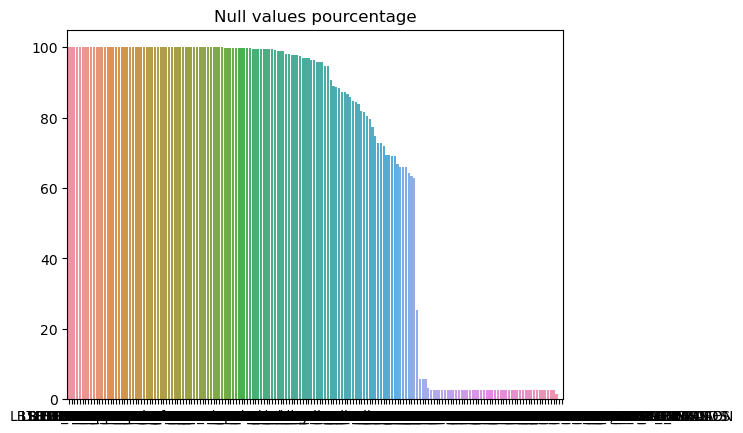

In [13]:
# Hist of NA per column
null_values = df_matrixAll_woTime.isnull().mean().sort_values(ascending=False)*100
null_values = null_values[null_values>0]
sns.barplot(x=null_values.index, y=null_values.values).set_title('Null values pourcentage')

## 5. EDA on df_matrixAll_woTime

In [2]:
# Open file
data_folder = './data/results/'
mylist = []
for chunk in pd.read_csv(data_folder + 'df_matrixAll_woTime.csv', sep=',', low_memory=False, chunksize=5000):
    mylist.append(chunk)
df_matrixAll_woTime = pd.concat(mylist, axis=0)
df_matrixAll_woTime.name = 'df_matrixAll_woTime'
del mylist

In [3]:
df_matrixAll_woTime.shape

(844341, 179)

(array([2.80700e+03, 2.34480e+04, 1.61211e+05, 8.86870e+04, 5.40375e+05,
        5.85200e+03, 2.20000e+01, 4.40000e+02, 1.43200e+03, 2.00670e+04]),
 array([ 77.,  87.,  97., 107., 117., 127., 137., 147., 157., 167., 177.]),
 <BarContainer object of 10 artists>)

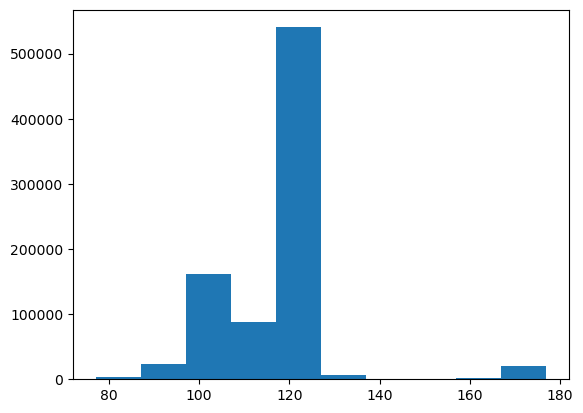

In [6]:
list_NA_per_row = df_matrixAll_woTime.isnull().sum(axis=1).tolist()
plt.hist(list_NA_per_row)

In [ ]:
# EDA on df_matrixAll_woTime
profile = ProfileReport(df_matrixAll_woTime, title="Pandas Profiling Report")
profile.to_file("./data/results/EDA_df_matrixAll_woTime.html")

In [6]:
# Delete columns with more than 60% NA
df_matrixAll_woTime_woNA60 = df_matrixAll_woTime.dropna(thresh=df_matrixAll_woTime.shape[0]*0.6,how='all',axis=1)
df_matrixAll_woTime_woNA60.shape

(844341, 54)

C:\Users\felic\anaconda3\envs\ada\lib\site-packages\multimethod\__init__.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\felic\anaconda3\envs\ada\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\felic\anaconda3\envs\ada\lib\site-packages\scipy\stats\_stats_py.py:5219: RuntimeWarning: invalid value encountered in sqrt
  z = con_minus_dis / np.sqrt(var)
C:\Users\felic\anaconda3\envs\ada\lib\site-packages\missingno\missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
C:\Users\felic\anaconda3\envs\ada\lib\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'The nu

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

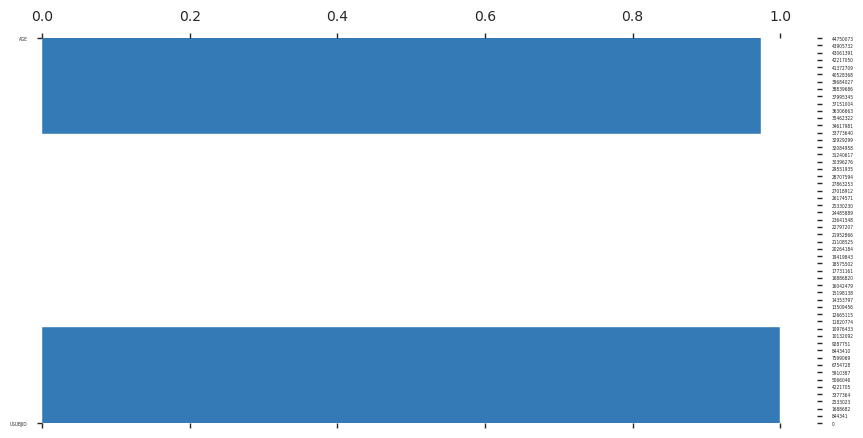

In [7]:
# EDA on df_matrixAll_woTime_woNA60
profile = ProfileReport(df_matrixAll_woTime_woNA60, title="Pandas Profiling Report")
profile.to_file("./data/results/EDA_df_matrixAll_woTime_woNA60.html")

**!!!!!!!!!! TODO : gestion des modify pour chaque fichier dans la partie 2 !!!!!!!!!**

In [8]:
df_matrixAll_woTime_woNA60

,USUBJID,AGE,SEX,COUNTRY,DSDECOD,HODECOD,INCLAS_AGENTS_ACTING_ON_THE_RENIN-ANGIOTENSIN_SYSTEM,INCLAS_ANALGESICS,INCLAS_ANESTHETICS,INCLAS_ANTIBACTERIALS_FOR_SYSTEMIC_USE,...,INCLAS_REMOVAL_OF_ENDOTRACHEAL_TUBE,INCLAS_RENAL_REPLACEMENT,INCLAS_REPLACEMENT_AGENT,INCLAS_TOTAL_PARENTERAL_NUTRITION,INCLAS_TRANSFUSION_OF_BLOOD_PRODUCT,INCLAS_VACCINES,MBTEST_SARSCOV2,SACAT_COMORBIDITIES,SACAT_COMPLICATIONS,SACAT_PREVIOUS_COVID-19_INFECTION
0,1,62.0,0.0,15.0,NaN,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0
1,2,76.0,1.0,15.0,2.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0
2,3,40.0,1.0,40.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
3,4,51.0,0.0,40.0,3.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0
4,5,64.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844336,844337,60.0,0.0,40.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,0.0
844337,844338,94.0,0.0,15.0,3.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0
844338,844339,37.0,1.0,40.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,0.0
844339,844340,43.0,0.0,40.0,3.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0


In [9]:
df_matrixAll_woTime_woNA60.columns

Index(['USUBJID', 'AGE', 'SEX', 'COUNTRY', 'DSDECOD', 'HODECOD',
       'INCLAS_AGENTS_ACTING_ON_THE_RENIN-ANGIOTENSIN_SYSTEM',
       'INCLAS_ANALGESICS', 'INCLAS_ANESTHETICS',
       'INCLAS_ANTIBACTERIALS_FOR_SYSTEMIC_USE', 'INCLAS_ANTIHELMINTICS',
       'INCLAS_ANTIINFLAMMATORY_AND_ANTIRHEUMATIC_PRODUCTS,_NON-STEROIDS',
       'INCLAS_ANTIMALARIALS', 'INCLAS_ANTIMYCOTICS_FOR_SYSTEMIC_USE',
       'INCLAS_ANTITHROMBOTIC_AGENTS', 'INCLAS_ANTIVIRALS_FOR_SYSTEMIC_USE',
       'INCLAS_ARTIFICIAL_RESPIRATION', 'INCLAS_BETA_BLOCKING_AGENTS',
       'INCLAS_BLOOD_SUBSTITUTES_AND_PERFUSION_SOLUTIONS',
       'INCLAS_BRONCHOSCOPY', 'INCLAS_CARDIAC_PACING',
       'INCLAS_CARDIAC_THERAPY', 'INCLAS_CARDIOPULMONARY_RESUSCITATION',
       'INCLAS_CHEMOTHERAPY', 'INCLAS_CORTICOSTEROIDS_FOR_SYSTEMIC_USE',
       'INCLAS_DIURETICS', 'INCLAS_DRUGS_FOR_ACID_RELATED_DISORDERS',
       'INCLAS_DRUGS_FOR_OBSTRUCTIVE_AIRWAY_DISEASES',
       'INCLAS_EXTRACORPOREAL_MEMBRANE_OXYGENATION',
       'INCLAS_H